# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 1. Cвойства и сравнение оценок
### Дедлайн --- 10 октября 23:59

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в чате курса https://t.me/+IHdLycZDD5g5MDQy.

Информация о способе сдачи домашнего задания будет позже.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [ ]:
# Matplotlib needed to correctly display suptitles,
# as well as some other minor things.
# I thought I might as well ensure everything is up to date
# %pip install --upgrade matplotlib numpy scipy statsmodels

In [ ]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [ ]:
np.random.seed(42)

**Условие задания**: Аспект-Император трёх морей Анасуримбор Келлхус спустя 20 лет с момента объединения Новой Империи объявляет начало Великой Ордалии --- похода против крепости Голготтерат. Поход займёт более, чем пол года путешествия сквозь безжизненные населённые дикими монстрами пустоши, в связи с чем Келлхус отдаёт приказ всем провинциям выдать провизию для похода, а имперским математикам, коим принадлежите Вы --- сосчитать, каждый ли правитель провинции выполнил приказ качественно.

В этой практике Вам придётся оценить число материальных ресурсов, предоставленных каждой из тысячи провинций, лучшим образом и предоставить отчёт, чему равно мат. ожидание числа ресурсов и почему Ваш способ оценивания хорош. Будем надеяться, что в среднем все короли добросовестно выполнили приказ.

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

### Задача 1

Известно, что количество урожая каждой Нансурской провинции в год подчиняется распределению $U[0, 2]$ в тоннах. Некоторые короли решают оставить существенную часть урожая, мимикрируя под $U[0, \theta]$ для $\theta < 2$. Нужно предложить метод оценки $\theta$. Если значение оценки будет меньше 2, приказ будет считаться невыполненным.

Сгенерируйте N выборок $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [ ]:
N = 1e4  # use this
N = int(N)
'''
Параметр  loc=a определяет начало отрезка, на котором случайная величина равномерно распределена.
Параметр  scale=b−a определяет длину отрезка, на котором задана случайная величина.
Значение плотности распределения на данном отрезке убывает с ростом данного параметра, то есть с ростом длины этого отрезка.
Чем меньше длина отрезка, тем больше значение плотности вероятности на отрезке.
'''
theta = 1 # Зафиксиксируем theta
samples = sps.uniform.rvs(loc=0, scale=theta, size=(N, N))
samples

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.94670792, 0.39748799,
        0.2171404 ],
       [0.37364082, 0.3329121 , 0.17615391, ..., 0.30369847, 0.44332001,
        0.17226481],
       [0.72999831, 0.184512  , 0.34663969, ..., 0.01945586, 0.40100484,
        0.25739798],
       ...,
       [0.03970217, 0.08480861, 0.37512912, ..., 0.86076063, 0.99985163,
        0.69288717],
       [0.95055816, 0.33617704, 0.33432589, ..., 0.37114898, 0.12602068,
        0.70761223],
       [0.36773231, 0.03404036, 0.2083359 , ..., 0.37520658, 0.59140324,
        0.35315818]])

Для всех $N$ выборок посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

При помощи моделирования выясните, какие оценки точнее, чем другие. Для этого постройте для разных $\theta$ распределение каждой из оценок. Какая оценка предпочтительнее? Почему? Как это согласуется с принципом среднеквадратичного подхода к сравнению оценок? Посчитайте точный и эмпирический риск каждой из них: $\hat{R}_{\theta}(\theta^*, \theta) = \frac{1}{n}\sum (\theta^*(S) - \theta)^2$, где $S$ это выборка и сравните их. Верны ли условия теоремы Рао-Крамера для данного семейства распределений? Существует ли эффективная оценка для равномерного распределения? Сделайте выводы о том, как эмпирический риск связан с теоретическим.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [ ]:
def estimates(samples, n):
  '''
  метод, считающий оценки параметра theta
  '''
  estimate = [0 for i in range(5)]
  X_mean = np.mean(samples, axis = 1)
  estimate[0] = 2 * X_mean
  X_max = np.maximum.accumulate(samples, axis = 1).max(axis = 1)
  X_min = np.minimum.accumulate(samples, axis = 1).min(axis = 1)
  estimate[1] = X_mean + X_max / 2
  estimate[2] = (n + 1)*X_min
  estimate[3] = X_min + X_max
  estimate[4] = (n + 1)*X_max/n
  return estimate

In [ ]:
estimates_res = estimates(samples, N)
estimates_res

[array([0.98831912, 1.00905975, 1.00010079, ..., 0.99333443, 0.99579882,
        1.00142116]),
 array([0.99401839, 1.00449229, 1.00000088, ..., 0.99659303, 0.99786366,
        1.00047902]),
 array([0.11635919, 1.57760353, 0.48128707, ..., 1.43683727, 0.45304851,
        3.64592066]),
 array([0.99972931, 1.00008257, 0.9999491 , ..., 0.9999953 , 0.9999738 ,
        0.99990145]),
 array([0.99981765, 1.00002482, 1.00000097, ..., 0.99995162, 1.00002849,
        0.99963684])]

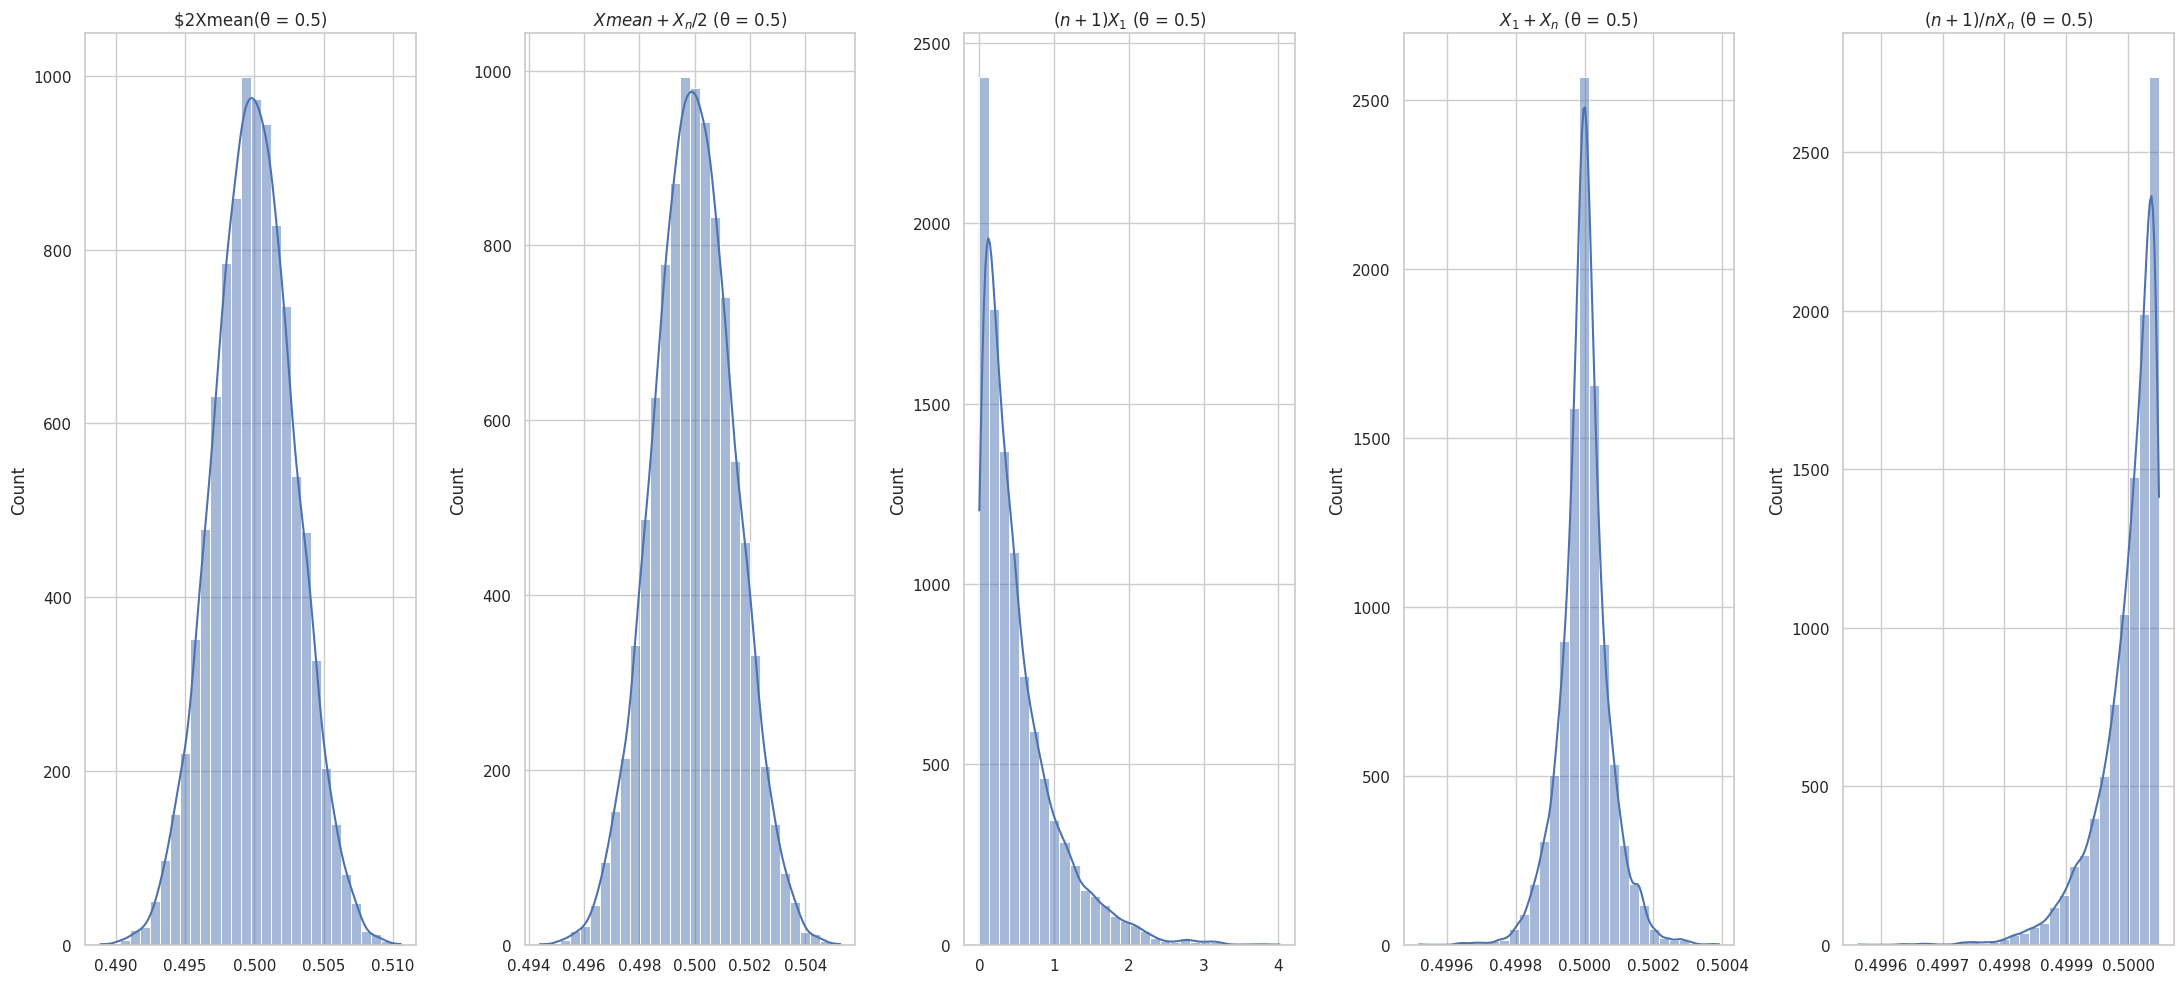

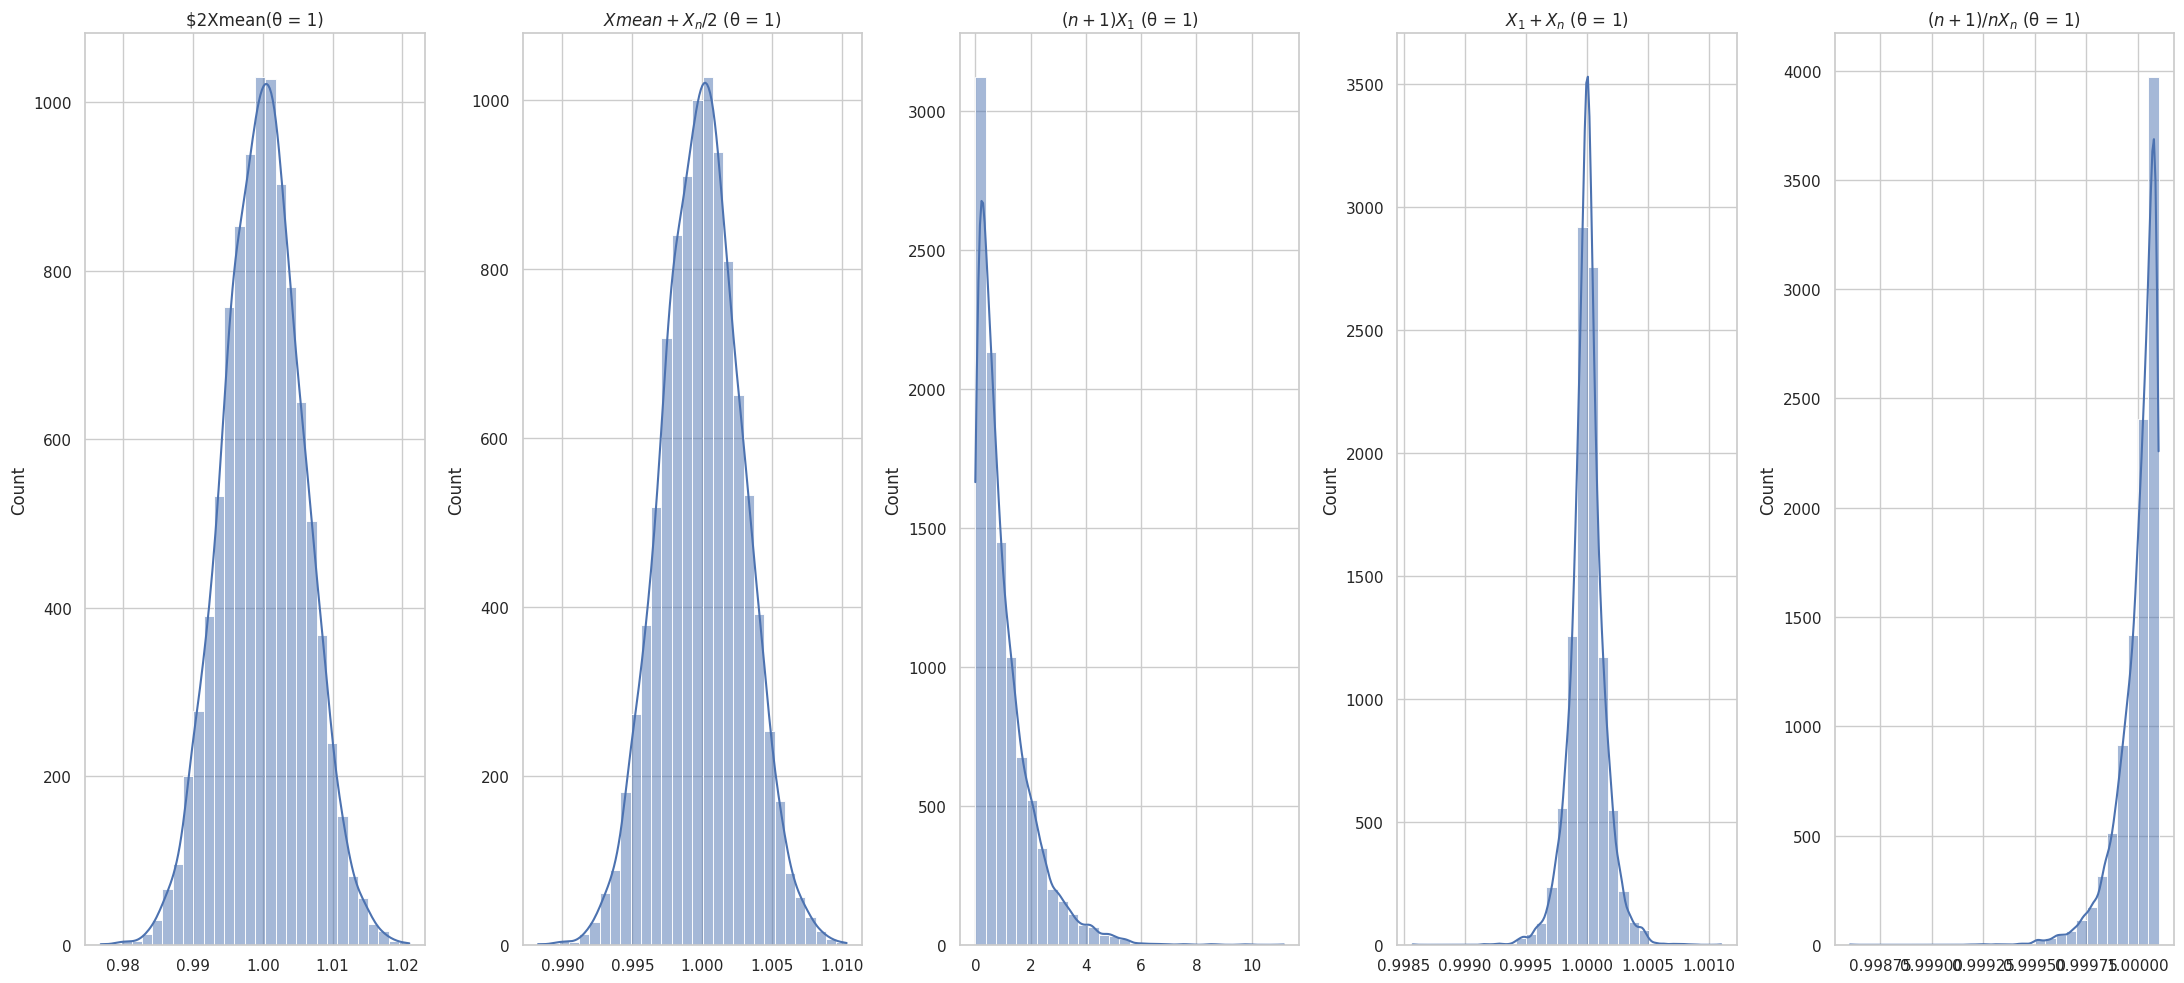

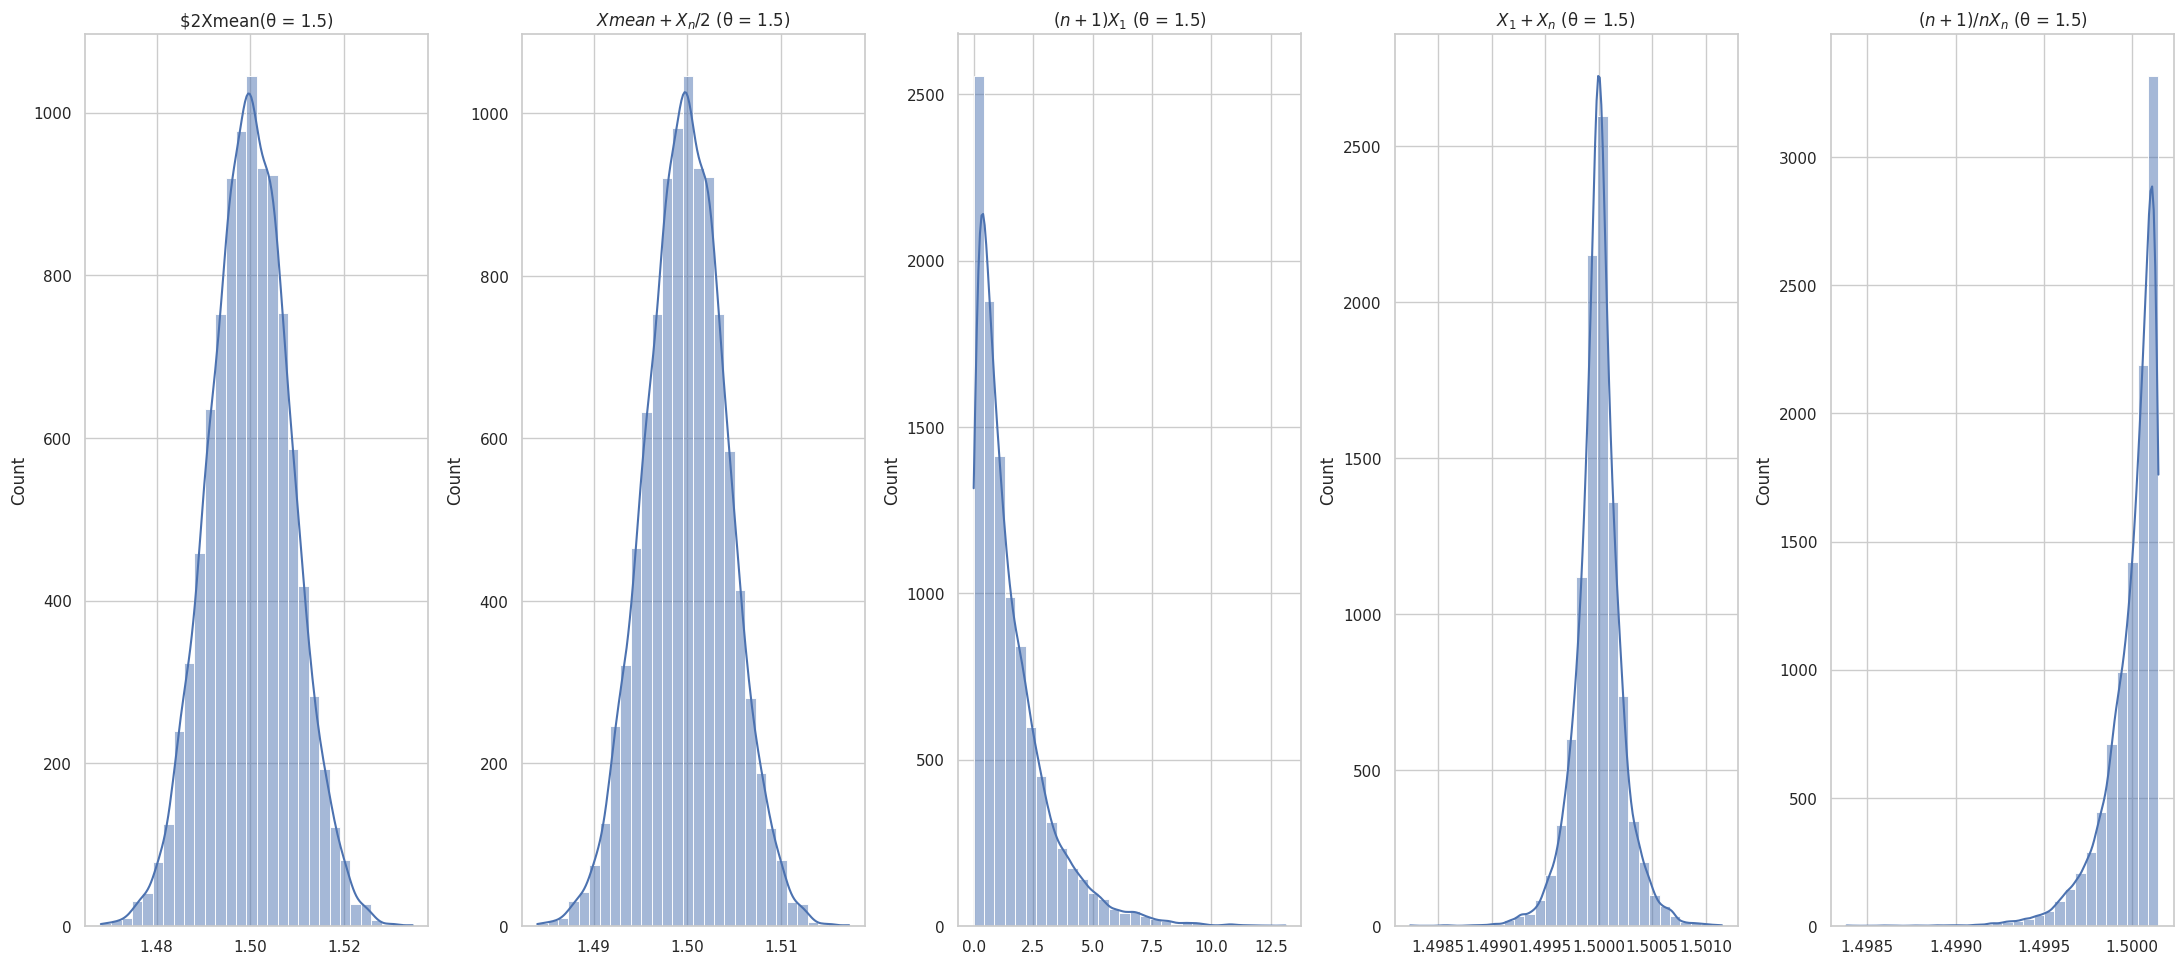

In [ ]:
theta_arr = [0.5, 1, 1.5]
estimates_save = []
for theta in theta_arr:
  samples = sps.uniform.rvs(loc=0, scale=theta, size=(N, N))
  estimates_res = estimates(samples, N)
  estimates_save.append(estimates_res)
  sns.set(style="whitegrid")  # Выбираем стиль  для графиков
  plt.figure(figsize=(22, 10))
  plt.subplot(1, 5, 1)
  sns.histplot(estimates_res[0], bins=30, kde=True)
  plt.title(f"$2Xmean(θ = {theta})")
  plt.subplot(1, 5, 2)
  sns.histplot(estimates_res[1], bins=30, kde=True)
  plt.title(f"$Xmean+ X_n/2$ (θ = {theta})")

  plt.subplot(1, 5, 3)
  sns.histplot(estimates_res[2], bins=30, kde=True)
  plt.title(f"$(n + 1)X_1$ (θ = {theta})")

  plt.subplot(1, 5, 4)
  sns.histplot(estimates_res[3], bins=30, kde=True)
  plt.title(f"$X_1 + X_n$ (θ = {theta})")

  plt.subplot(1, 5, 5)
  sns.histplot(estimates_res[4], bins=30, kde=True)
  plt.title(f"$(n+1)/n X_n$ (θ = {theta})")

  plt.tight_layout()
  plt.show()

**При помощи моделирования выясните, какие оценки точнее, чем другие.**

Можно предположить, что оценки 1, 2, 4 и 5, у которых пики гистограмм сосредоточены вокруг истинного значения параметра, могут быть более точными по сравнению с оценкой 3.






**Какая оценка предпочтительнее? Почему?**


$2\overline{X}, \; (n+1)X_{(1)}, \; \frac{n+1}{n} X_{(n)}$. - данные оценки являются несмещенными => функция риска это дисперсия. Знаем что, хорошая оценка должна минимизировать функцию риска. Но неясно как сравнивать функции риска для разных оценок: для одних значений параметра одна оценка, а для других соответственно другая. Поэтому самым простым решением будет использовать равномерный подход. Равномерный подход с квадратичной функцией потерь - среднеквадратичный

Посчитаем риск
$R(2\overline{X}, \theta) = D_{\theta}(2\overline{X}) = \frac{\theta^2}{3n}$

$R((n+1)X_{(1)}, \theta) = D_{\theta}((n+1)X_{(1)}) = \frac{\theta^2n}{(n + 2)}$

Видим что дисперсия не стремится к нулю при увеличении размера выборки, значит данная оценка весьма плохая в среднеквадратичном подходе

$R(\frac{n+1}{n} X_{(n)}, \theta) = D_{\theta}(\frac{n+1}{n} X_{(n)}) = \frac{\theta^2}{n(n + 2)}$

Полученная дисперсия убывает стремительно, значит в среднеквадратическом подходе оценка весьма неплоха
$\overline{X} + X_{(n)}/2$ - смещенная
$R(\overline{X} + X_{(n)}/ 2, \theta) = E(\overline{X} + \frac{X_{(n)}}{2} -\theta)^2 = E(\overline{X}^2) + \frac{1}{4}E(X_{(n)}^2) + E\overline{X}X_{(
n)} - 2\theta E(\overline{X} + \frac{X_{(n)}}{2}) + \theta^2$

$E\overline{X}^2 = \frac{3n + 1}{12n}\theta^2 $

$E(X_{(n)}^2) = \frac{n}{n+2}\theta^2$

$E(\overline{X} + \frac{X_{(n)}}{2}) = \frac{\theta}{2} + \frac{n\theta}{2(n+1)} $

$E\overline{X}X_{(n)} = \frac{\theta^2}{2(n+2)}$
$R(\overline{X} + X_{(n)}/ 2, \theta) = \frac{n^2+15n+2}{12n(n+2)(n+1)}\theta^2$

$R$ убывает стремительно, значит в среднеквадратическом подходе оценка весьма неплоха

$X_{(1)} + X_{(n)}$ - несмещенная оценка, значит ее риск равен дисперсии
$R(X_{(1)} + X_{(n)}, \theta) = D(X_{(1)} + X_{(n)}) = E(X_{(1)} + X_{(n)})^2 - (E(X_{(1)} + X_{(n)}))^2$

$E(X_{(1)} + X_{(n)})^2 = EX_{(1)}^2 + EX_{(n)}^2 + 2EX_{(1)}X{(n)}$

$EX_{(1)}^2 = 2 \frac{\theta^2}{(n+1)(n+2)}$

$EX_{(n)}^2 = \frac{\theta^2 n }{n+2}$

$EX_{(1)}X{(n)} = \frac{\theta^2 n }{n+2} = \frac{2\theta^2}{(n+1)(n+2)}$

$R(X_{(1)} + X_{(n)}, \theta) =\frac{2\theta^2}{(n+1)(n+2)}$

$R$ убывает стремительно, значит в среднеквадратическом подходе оценка весьма неплоха

Как видно из графиков 3я оценка является наихудшей. В среднеквадратичном подходе у нее наибольшая функция риска. У оценки наибольший разброс значений, а следовательно и дисперсия. Оценка 2 является смещенной, однако отклонение является небольшим, ее дисперсия меньше чем у оценки 3 и ее риск меньше, следовательно вторая оценка является лучше по сравнению с оценкой 3. Но тк оценка является смещенной то она хуже всех трех оставшихся.Посмотрим на посчитанные риски, и последняя (5) оценка является наиболее точной это видно по графику, тк в окресности $\theta$ оценка имеет наибольшее количество значений


Посчитаем **эмпирический риск**


In [ ]:
def calculate_emp_risk(values, theta, n):
  return np.sum(np.square(values - theta.T), axis = 0) / n
def theoretical_risk(n, theta):
  if n == 0:
    return theta**2/(3*N)
  elif n == 1:
    return ((N**2 + 15*N + 2) * theta**2) / (12*N*(N+2)*(N+1))
  elif n == 2:
    return (theta**2 * N) / (N + 2)
  elif n == 3:
    return (2*theta**2) / ((N+1)*(N+2))
  return (theta**2) / (N*(N + 2))
theta_arr = np.array([0.5, 1, 1.5])
i = 0
np.array(estimates_save).shape
for theta, i in zip(theta_arr, range(3)):
  for j in range(5):
    emp_risk = calculate_emp_risk(np.array(estimates_save[i][j]), np.array([theta]*N), N)
    # i+=N
    print(f"Empirical Risk for theta={theta}, estimates {j + 1}: {emp_risk}, theoretical risk = {theoretical_risk(j, theta)}")

Empirical Risk for theta=0.5, estimates 1: 8.52155196251342e-06, theoretical risk = 8.333333333333334e-06
Empirical Risk for theta=0.5, estimates 2: 2.1326695088398923e-06, theoretical risk = 2.0858325835082957e-06
Empirical Risk for theta=0.5, estimates 3: 0.25253474118941655, theoretical risk = 0.2499500099980004
Empirical Risk for theta=0.5, estimates 4: 5.012531902264493e-09, theoretical risk = 4.9985003499250154e-09
Empirical Risk for theta=0.5, estimates 5: 2.4406092626608026e-09, theoretical risk = 2.499500099980004e-09
Empirical Risk for theta=1.0, estimates 1: 3.354888684047055e-05, theoretical risk = 3.3333333333333335e-05
Empirical Risk for theta=1.0, estimates 2: 8.392584907688068e-06, theoretical risk = 8.343330334033183e-06
Empirical Risk for theta=1.0, estimates 3: 1.0122611722879515, theoretical risk = 0.9998000399920016
Empirical Risk for theta=1.0, estimates 4: 2.0337560646832126e-08, theoretical risk = 1.9994001399700062e-08
Empirical Risk for theta=1.0, estimates 5:

Видим что эмпирический и теоретический риски сходятся

 **Верны ли условия теоремы Рао-Крамера для данного семейства распределений?**

Нет, так как не выполняется второе условие регулярности, так как плотность зависит от $\theta$
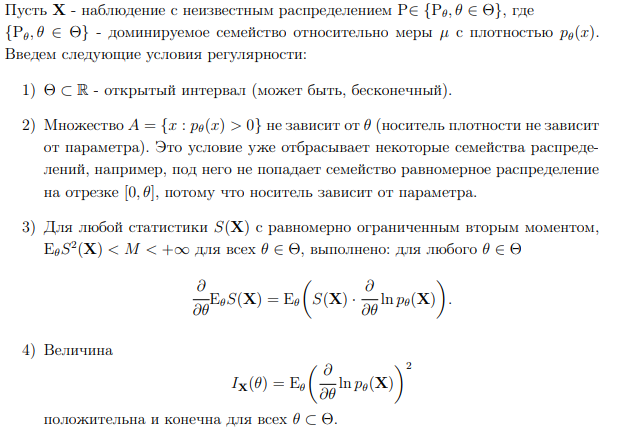


 **Существует ли эффективная оценка для равномерного распределения?**

 $\frac{n+1}{n} X_{(n)}$


 **Сделайте выводы о том, как эмпирический риск связан с теоретическим**


Выводы:
Эмпирический риск (Empirical Risk) — это средняя величина ошибки алгоритма на обучающей выборке.

- Эмпирический риск оценивает производительность модели на имеющихся данных и ориентирован на выбор наилучшей модели для конкретной выборки.
- Теоретический риск анализирует свойства модели на уровне популяции и позволяет делать выводы о ее обобщающей способности.
- Связь между эмпирическим и теоретическим риском заключается в том, что хорошо обученная модель с низким эмпирическим риском может иметь хороший теоретический риск, что указывает на ее способность обобщать на новые данные. Однако низкий эмпирический риск не всегда гарантирует низкий теоретический риск, так как обобщающая способность модели также зависит от структуры данных и качества моделирования.

Пусть теперь $\theta$ само приходит из равномерного распределения $U[0, 1]$. При помощи моделирования посчитайте эмпирический риск в байесовском подходе к сравнению оценок и сравните оценки. Сохранится ли порядок оценок по качеству? Почему?

Постройте на одном графике разными цветами для всех оценок эмпирическую функцию распределения или гистограмму (аналог эмпирической плотности). Если некоторые оценки сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (или бинами гистограммы). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

In [ ]:
print(np.array(estimates_save).shape)
print(estimates_save[0][1])

(3, 5, 10000)
[0.50046462 0.50100203 0.49784625 ... 0.49819558 0.49839555 0.49984957]


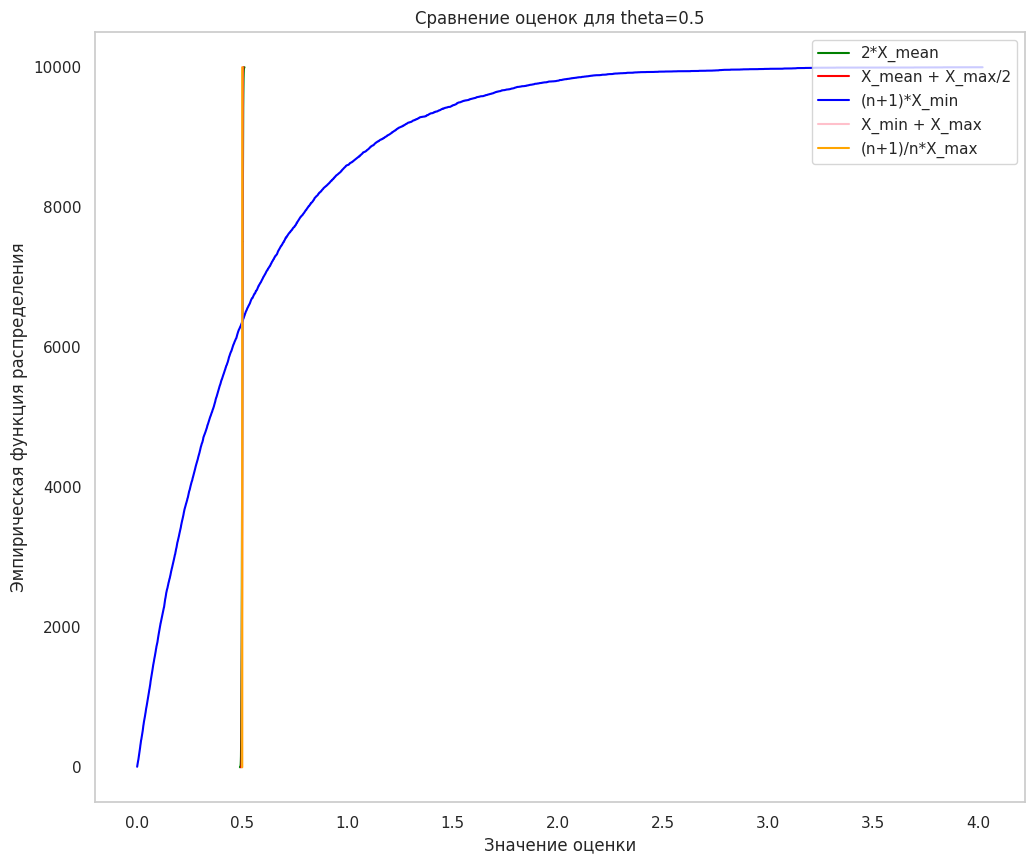

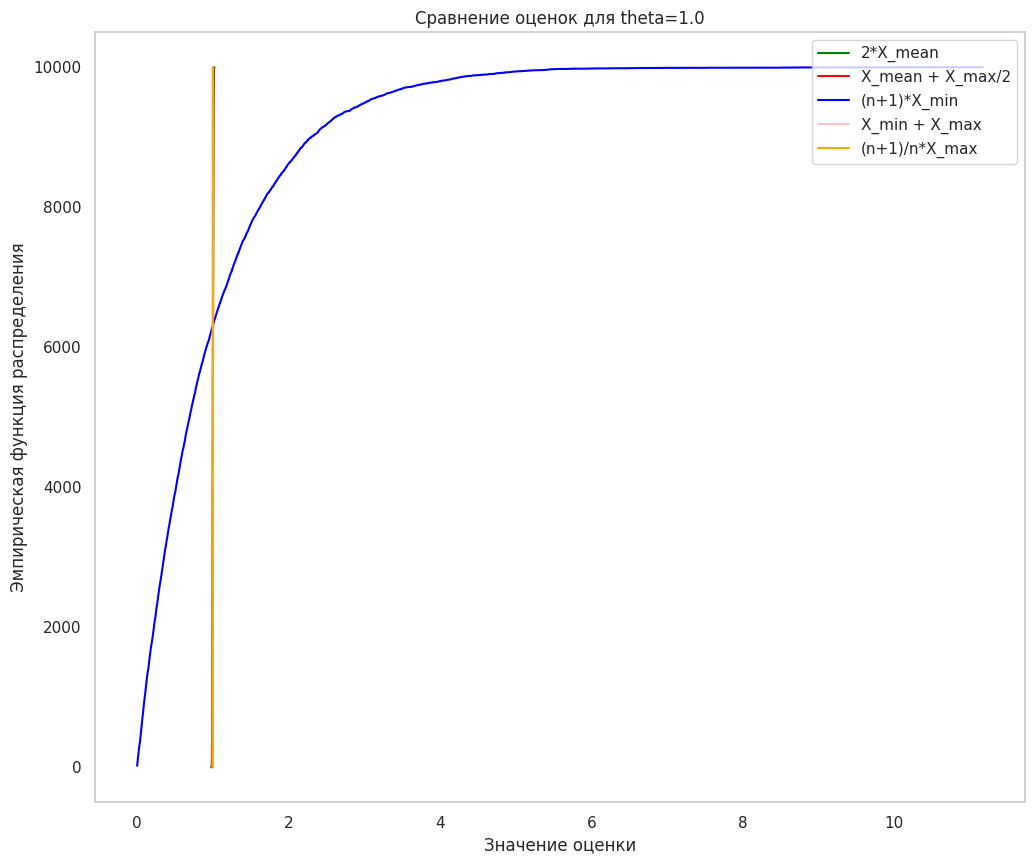

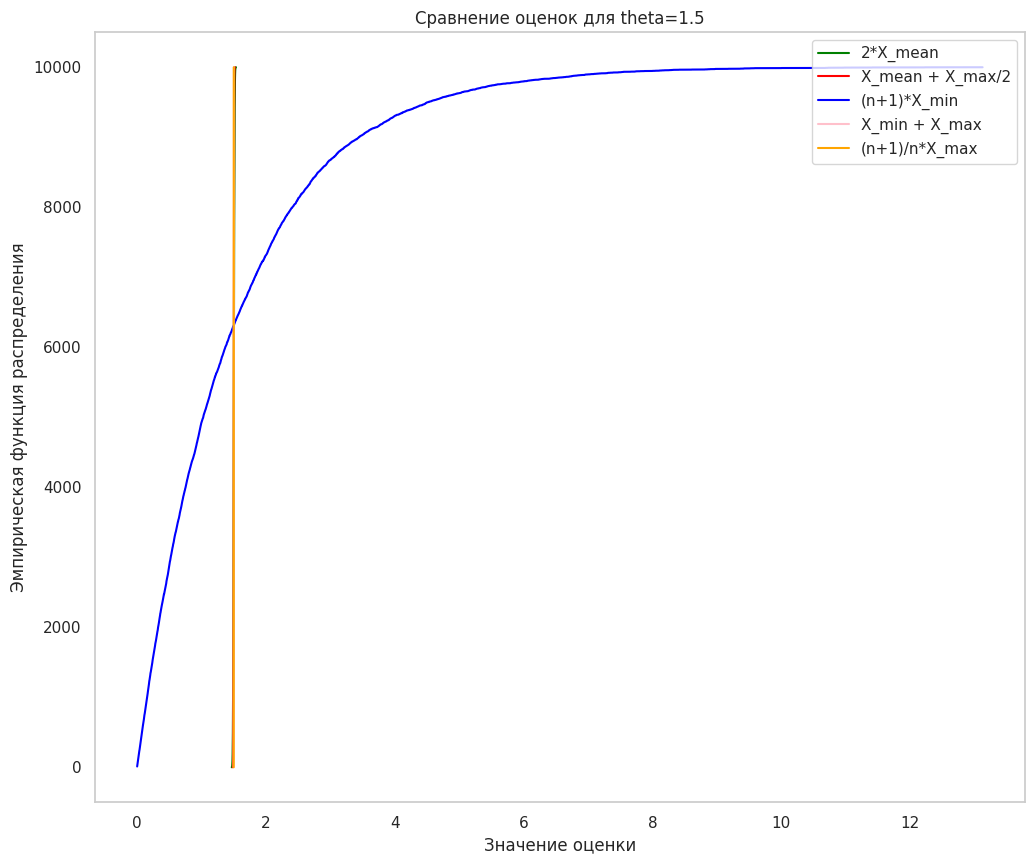

In [ ]:
# Задаем параметры
N = int(1e4)  # Количество выборок
theta_values = [0.5, 1.0, 1.5]  # Разные значения параметра theta
colors = ['green', 'red', 'blue', 'pink', 'orange']
labels = ['2*X_mean', 'X_mean + X_max/2', '(n+1)*X_min', 'X_min + X_max', '(n+1)/n*X_max']
for theta, i in zip(theta_arr, range(3)):
  plt.figure(figsize=(12, 10))
  legend_lines = []
  for j in range(5):
    bin_dt, bin_gr = np.histogram(estimates_save[i][j], bins=len(estimates_save[i][j]))
    Y = bin_dt.cumsum()
    Y = np.insert(Y, len(Y), Y[-1])
    plt.plot(bin_gr, Y, label = labels, color = colors[j])
    # for k in range(len(Y)):
    #     plt.plot([bin_gr[k], bin_gr[k+1]],[Y[k], Y[k]], color=colors[j])
  # plt.xlim(0, theta)
  plt.legend(labels, loc='upper right')
  plt.title(f'Сравнение оценок для theta={theta}')
  plt.xlabel('Значение оценки')
  plt.ylabel('Эмпирическая функция распределения')
  plt.grid()
  plt.show()


Заметим, что оценка $(n+1)X_{(n)}$ сильно отличается от $\theta$. Исключим эту оценку и построим теперь без нее.

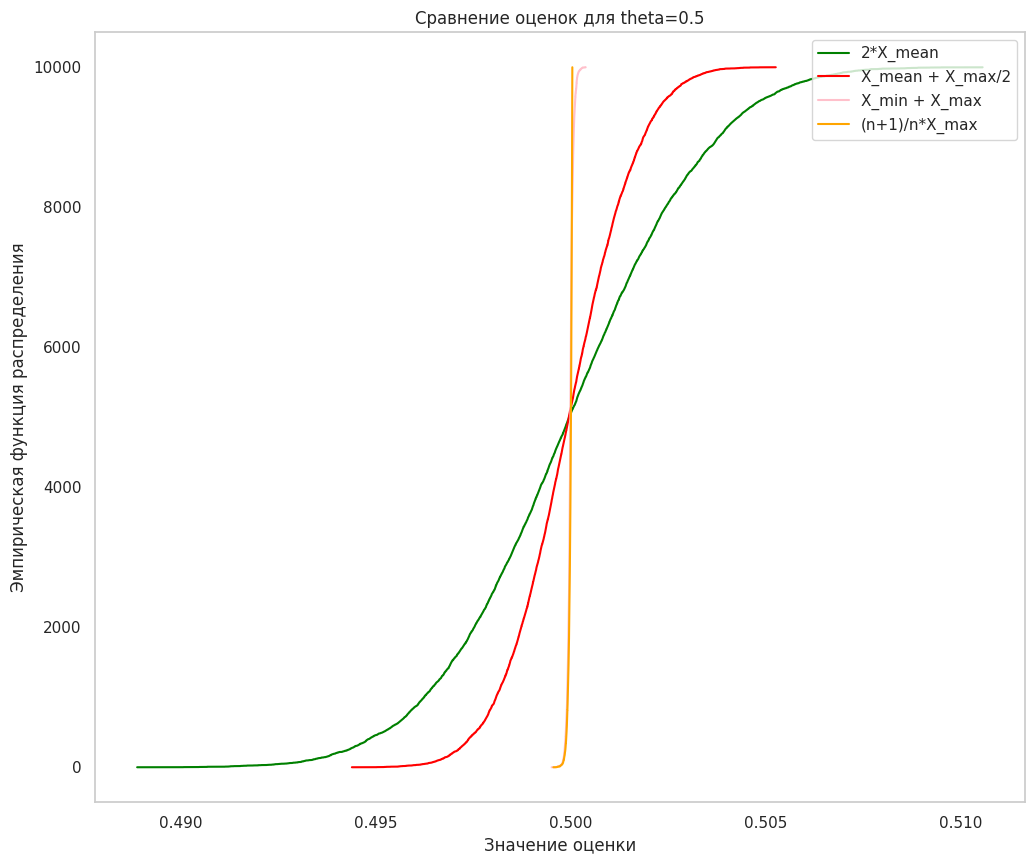

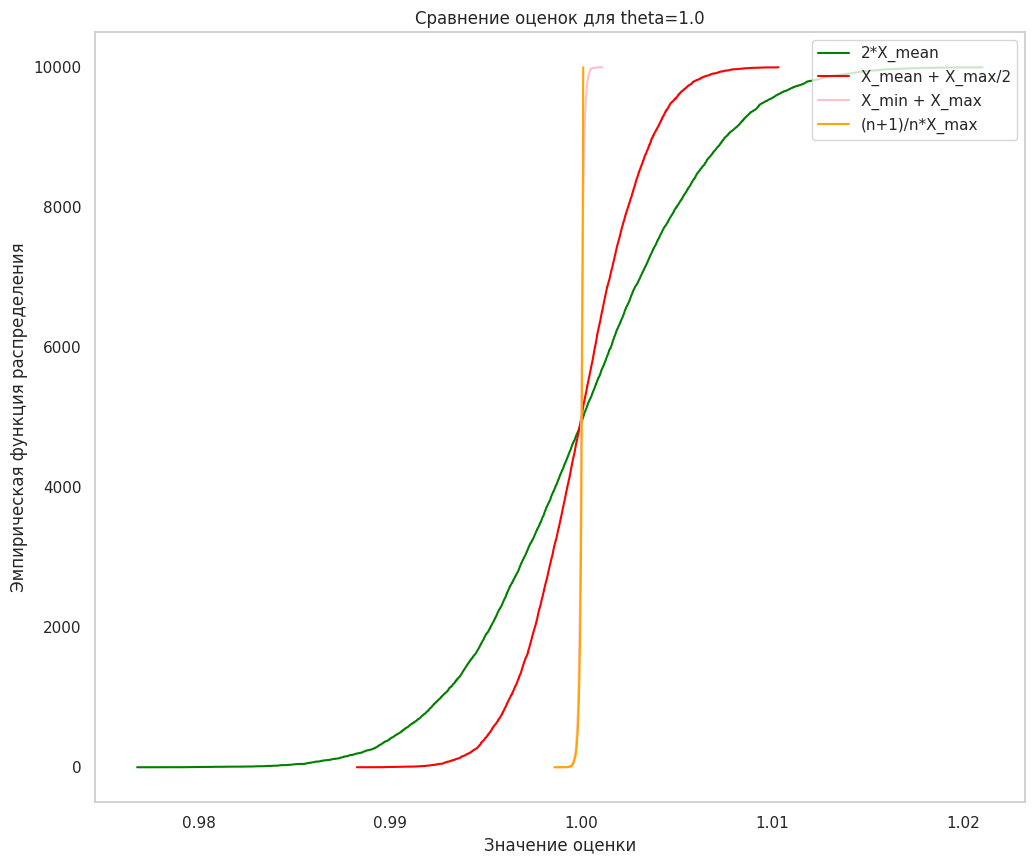

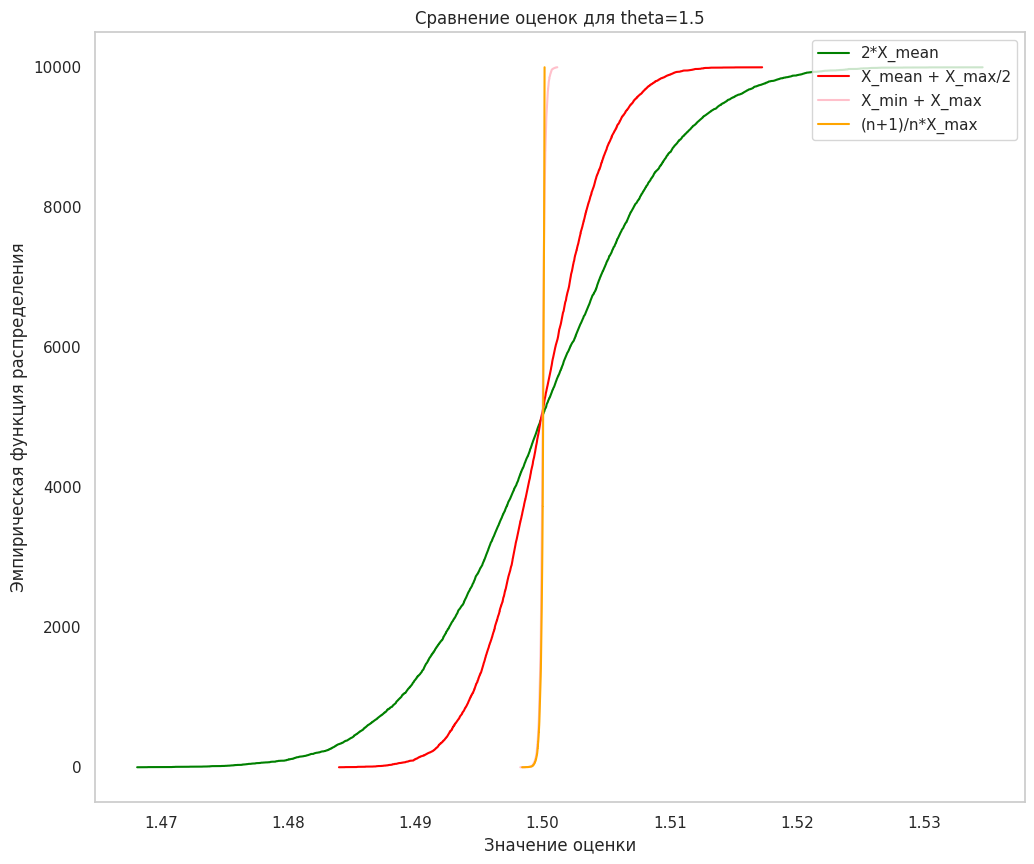

In [ ]:
# Задаем параметры
N = 1e4  # Количество выборок
theta_values = [0.5, 1.0, 1.5]  # Разные значения параметра theta
colors = ['green', 'red', 'blue', 'pink', 'orange']
labels = ['2*X_mean', 'X_mean + X_max/2', 'X_min + X_max', '(n+1)/n*X_max']
for theta, i in zip(theta_arr, range(3)):
  plt.figure(figsize=(12, 10))
  legend_lines = []
  for j in range(5):
    if j == 2:
      continue
    bin_dt, bin_gr = np.histogram(estimates_save[i][j], bins=len(estimates_save[i][j]))
    Y = bin_dt.cumsum()
    Y = np.insert(Y, len(Y), Y[-1])
    plt.plot(bin_gr, Y, label = labels, color = colors[j])
    # for k in range(len(Y)):
    #     plt.plot([bin_gr[k], bin_gr[k+1]],[Y[k], Y[k]], color=colors[j])
  # plt.xlim(0, theta)
  plt.legend(labels, loc='upper right')
  plt.title(f'Сравнение оценок для theta={theta}')
  plt.xlabel('Значение оценки')
  plt.ylabel('Эмпирическая функция распределения')
  plt.grid()
  plt.show()

Какая оценка получилась лучше? Как Вы это поняли?

Из графика видно, что самая точная оценка это $\frac{n+1}{n} X_{(n)}$, тк она
лучше всех приближает к $\theta$, так же хорошей оценкой можно считать $X_{(1)} + X_{(n)}$

__Ответ:__


Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

см выше

Сделайте вывод.


__Вывод:__

### Задача 2

Конрийские провинции известны своими пастбищами и скотоводами. Принц Нерсей Пройас замерил, что количество скота подчиняется экспоненциальному распределению с параметром $\lambda = 1$ (в тысячах голов). Для подсчёта оценки параметра есть семейство оценок $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$, каждая следующая из которых требует большего числа операций на вычисление. Стоит ли оно того? Это и нужно выяснить.

Сгенерируйте $N$ выборок $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$.

In [ ]:
np.random.seed(42)

In [ ]:
theta = 1
N = int(1e4)
exp_samples = sps.expon.rvs(loc=0, scale=theta, size=(N, N))
exp_samples

array([[0.46926809, 3.01012143, 1.31674569, ..., 2.93196746, 0.50664768,
        0.24480191],
       [0.4678313 , 0.40483345, 0.19377155, ..., 0.36197248, 0.58576472,
        0.189062  ],
       [1.30932706, 0.20396857, 0.42562653, ..., 0.01964762, 0.51250177,
        0.29759502],
       ...,
       [0.0405118 , 0.08862207, 0.47021024, ..., 1.97156076, 8.81582428,
        1.18054008],
       [3.00695817, 0.4097398 , 0.40695505, ..., 0.4638609 , 0.13469856,
        1.22967437],
       [0.45844242, 0.03463322, 0.23361809, ..., 0.47033421, 0.89502652,
        0.4356535 ]])

Для всех выборок посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).




In [ ]:
def calc_est_for_k(X, k):
  return (np.math.factorial(k) / (np.sum(X ** k, axis = 1)/ N))**(1/k)

In [ ]:
k_range = range(1, 11)
estimates = []
for i in range(10):
  estimates.append(calc_est_for_k(exp_samples, k_range[i]))
estimates

[array([1.023019  , 0.9818057 , 1.00375737, ..., 1.01136007, 0.99437244,
        1.00233781]),
 array([1.02466498, 0.98077318, 1.00425964, ..., 1.01203717, 0.98598279,
        1.00850283]),
 array([1.02985766, 0.98030623, 1.0034356 , ..., 1.01534381, 0.98436555,
        1.01747671]),
 array([1.038797  , 0.98249798, 1.00476928, ..., 1.020505  , 0.98789513,
        1.03092654]),
 array([1.05144538, 0.98847547, 1.00984462, ..., 1.02749244, 0.99481751,
        1.0494919 ]),
 array([1.06789509, 0.99832927, 1.01915344, ..., 1.03662319, 1.00406537,
        1.07295475]),
 array([1.08814559, 1.01163353, 1.03261955, ..., 1.04843019, 1.01531469,
        1.10066619]),
 array([1.11197771, 1.0278806 , 1.0498721 , ..., 1.06338099, 1.02862797,
        1.13187018]),
 array([1.13900588, 1.04665931, 1.07041506, ..., 1.08166316, 1.04413802,
        1.16587247]),
 array([1.1687808 , 1.06766742, 1.09373634, ..., 1.10316882, 1.06189991,
        1.20209891])]

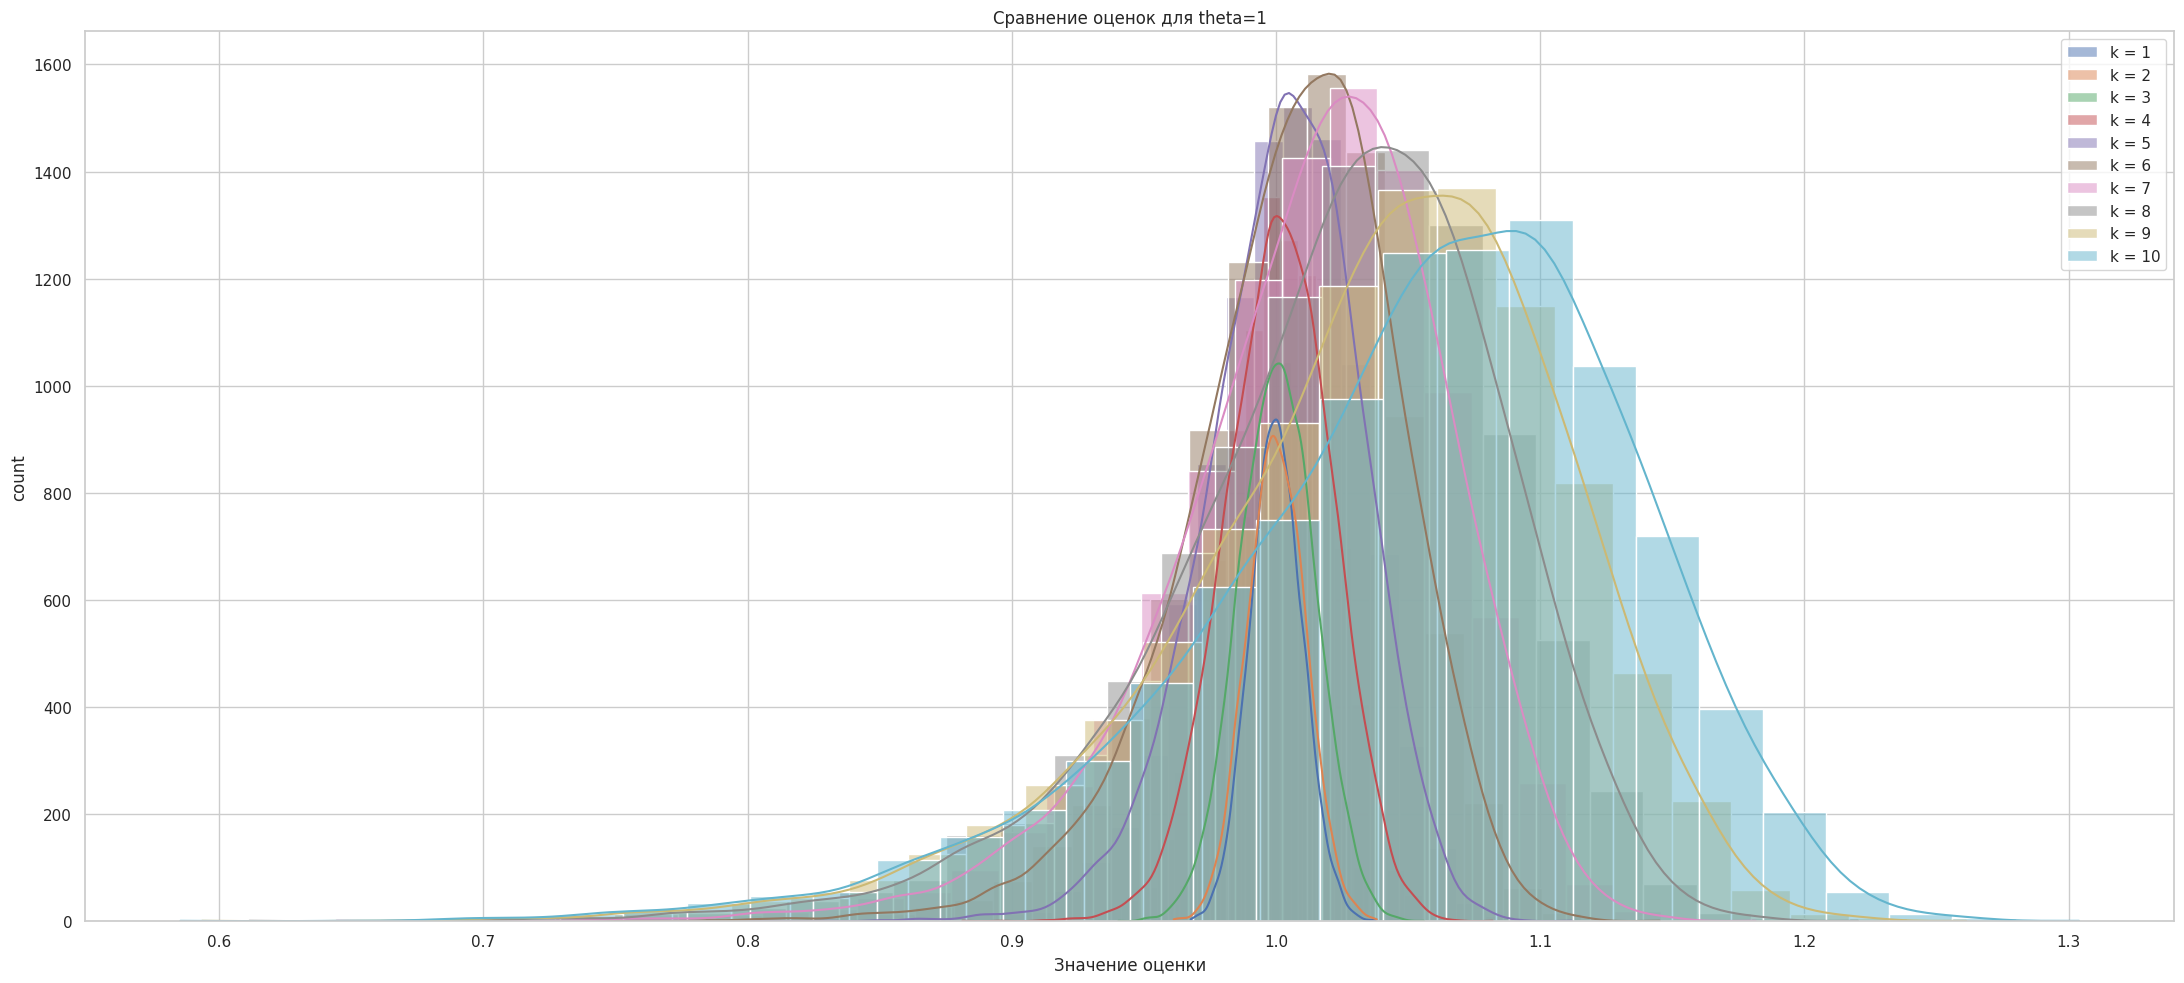

In [ ]:
# график
sns.set(style="whitegrid")  # Выбираем стиль  для графиков
plt.figure(figsize=(22, 10))
for i, k in enumerate(k_range):
  sns.histplot(estimates[i], bins=30, label = f"k = {k}", kde=True)
plt.legend()
plt.title(f'Сравнение оценок для theta={theta}')
plt.xlabel('Значение оценки')
plt.ylabel('count')
plt.tight_layout()
plt.show()

Таким образом, при меньших значениях k дисперсия получается меньше, следовательно оценка лучше.


Являются ли данные оценки асимптотически нормальными? Проверьте это теоретически и моделированием (постройте эмпирическую функцию/плотность распределения статистики $\sqrt{n}(\theta^* - \theta)$). Посчитайте дисперсию оценок для разных $k$ и **разных** размеров выборки. Сходится ли она к теоретической? Что Вы можете сказать о скорости сходимости?

Проверим данный оценки на асимптотическую нормальность
$EX_{1}^k = \int\limits_{-\infty}^{+\infty}t^k \theta e^{-\theta t}dt = \frac{k!}{\theta^k}$

Применим ЦПТ

$\sqrt{n}(\overline{X^k} - \frac{k!}{\theta^k}) \rightarrow^{d_{\theta}} N(0, D_{\theta}X_1^k) = N(0, E_{\theta}X_1^{2k} - (E_{\theta}X_1^k)^2 = N(0, \frac{(2k)!-(k!)^2}{\theta^{2k}})$

Применим теорему о наследовании ассимптотической нормальности для $\tau(x) = (\frac{k!}{x})^{\frac{1}{k}}$

 $\tau'(x) = -\frac{k!^{\frac{1}{k}}}{kx^{1 + \frac{1}{k}}}$

 $\tau'(\frac{k!}{\theta^2}) = \frac{\theta^{k+1}}{k!k}$

 $\sqrt{n}(\overline{X^k} - \frac{k!}{\theta^k}) \rightarrow^{d_{\theta}} N(0, \frac{(2k)!-(k!)^2}{\theta^{2k}}\frac{\theta^{2k+2}}{k!^2k^2}) = N(0, \frac{((2k)!-(k!)^2)\theta^{2}}{k!^2k^2} )$

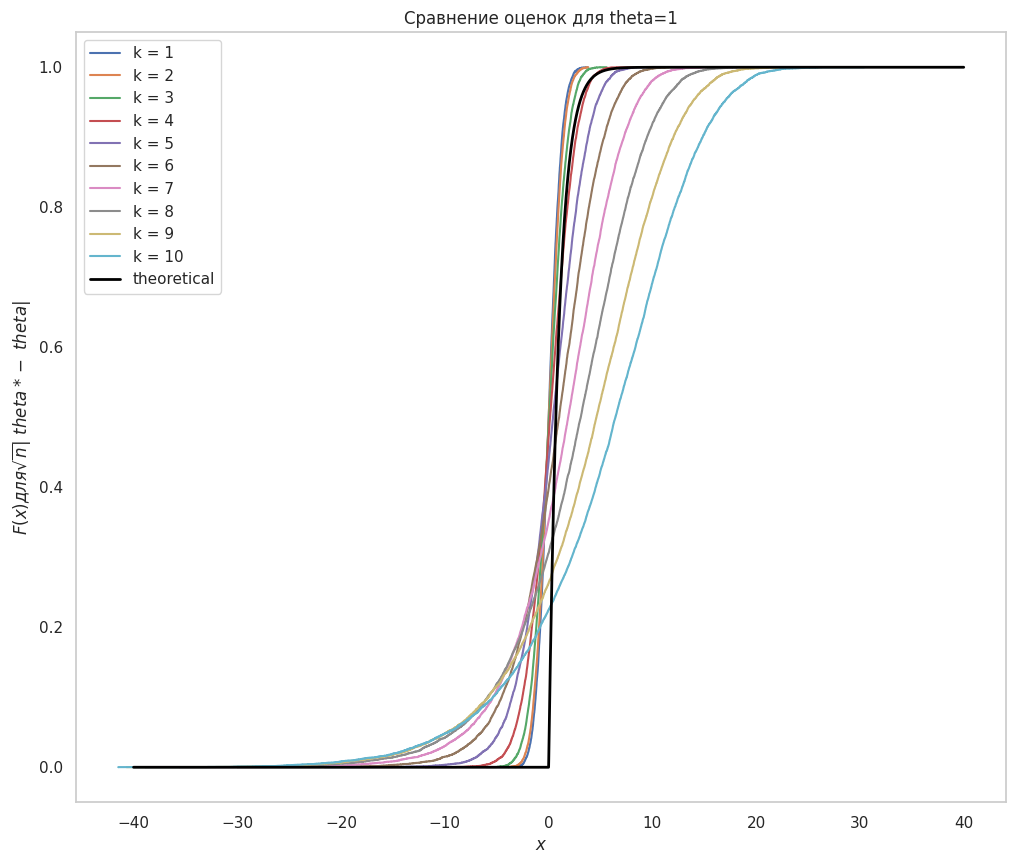

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
x = np.linspace(-40,40,N)
exp_samples_cdf = sps.expon.cdf(x)
plt.figure(figsize=(12, 10))
for i, k in enumerate(k_range):
  # X = np.sort(estimates[i])
  # F = np.array(range(N))/float(N)
  # plt.plot(X, F, label = f'theoretical cdf k = {k}')
  ecdf = ECDF(np.math.sqrt(N)*(estimates[i] - theta))
  plt.step(ecdf.x, ecdf.y, label = f'k = {k}')
plt.plot(x, exp_samples_cdf, label = 'theoretical', color = 'black', linewidth = 2)
plt.ylabel('$F(x) для \sqrt{n}| \ theta* - \ theta|$')
plt.xlabel("$x$")
plt.legend()
plt.title(f'Сравнение оценок для theta={theta}')
plt.grid()
plt.show()

In [ ]:
for i, k in enumerate(k_range):
  theoretical = (np.math.factorial(2*k) -  np.math.factorial(k)**2) / (k**2 *  np.math.factorial(k)**2)
  print(f'k = {k}, theoretical = {theoretical}, D = {np.var(np.sqrt(N)*(estimates[i] - [theta]*len(estimates[i])))}')

k = 1, theoretical = 1.0, D = 0.9914724553133548
k = 2, theoretical = 1.25, D = 1.2369698180603803
k = 3, theoretical = 2.111111111111111, D = 2.088694250984601
k = 4, theoretical = 4.3125, D = 4.158995294503185
k = 5, theoretical = 10.04, D = 8.587828725186293
k = 6, theoretical = 25.63888888888889, D = 16.279656842237543
k = 7, theoretical = 70.0204081632653, D = 26.96561326837131
k = 8, theoretical = 201.078125, D = 39.5667247090031
k = 9, theoretical = 600.2345679012345, D = 53.06140430828563
k = 10, theoretical = 1847.55, D = 66.82708321729345


Сделайте вывод.
При малых значениях k дисперсии близки друг к другу.



__Вывод:__

### Задача 3

**Кианские провинции до сих пор надеются отделиться от Новой Империи, и поэтому планируют саботировать Ордалию. К их счастью, число урожая в пустынных землях на юге подчиняется распределению Коши, которое отличается существенно от двух распределений из задач 1 и 2. Чем отличается? Как это повлияет на оценивание его параметра сдвига?**

Основные характеристики распределения Коши, которые могут повлиять на оценивание его параметра сдвига:

Распределение Коши имеет тяжелый хвост, то есть вероятность появления выбросов (экстремальных значений) значительно выше, чем у распределений с легкими хвостами. Это может сделать оценку параметра сдвига более чувствительной к выбросам.

У распределения Коши не существует математического ожидания, и дисперсии

Для оценки параметра сдвига распределения Коши часто используется метод минимизации функции потерь, такой как медиана. Медиана является более устойчивой оценкой параметра сдвига в присутствии выбросов.

**Для распределения Коши моделированием изучите поведение оценки параметра сдвига при помощи среднего и медианы. У какой из этих оценок лучше асимптотические свойства? Как это обосновывается теоретическими свойствами оценок? Моделированием проверьте, какие оценки состоятельны и асимптотически нормальны. Сравните результат с теоретическим.**

In [ ]:
# сгенерируем распределение
N = int(1e4)
shift = 0 # сдвиг
X_caushy = sps.cauchy.rvs(loc = shift, scale = 1, size=N)
X_caushy

array([-0.84848536, -0.18709266,  0.60220818, ..., -4.44786593,
       -1.94432534, -1.19268341])

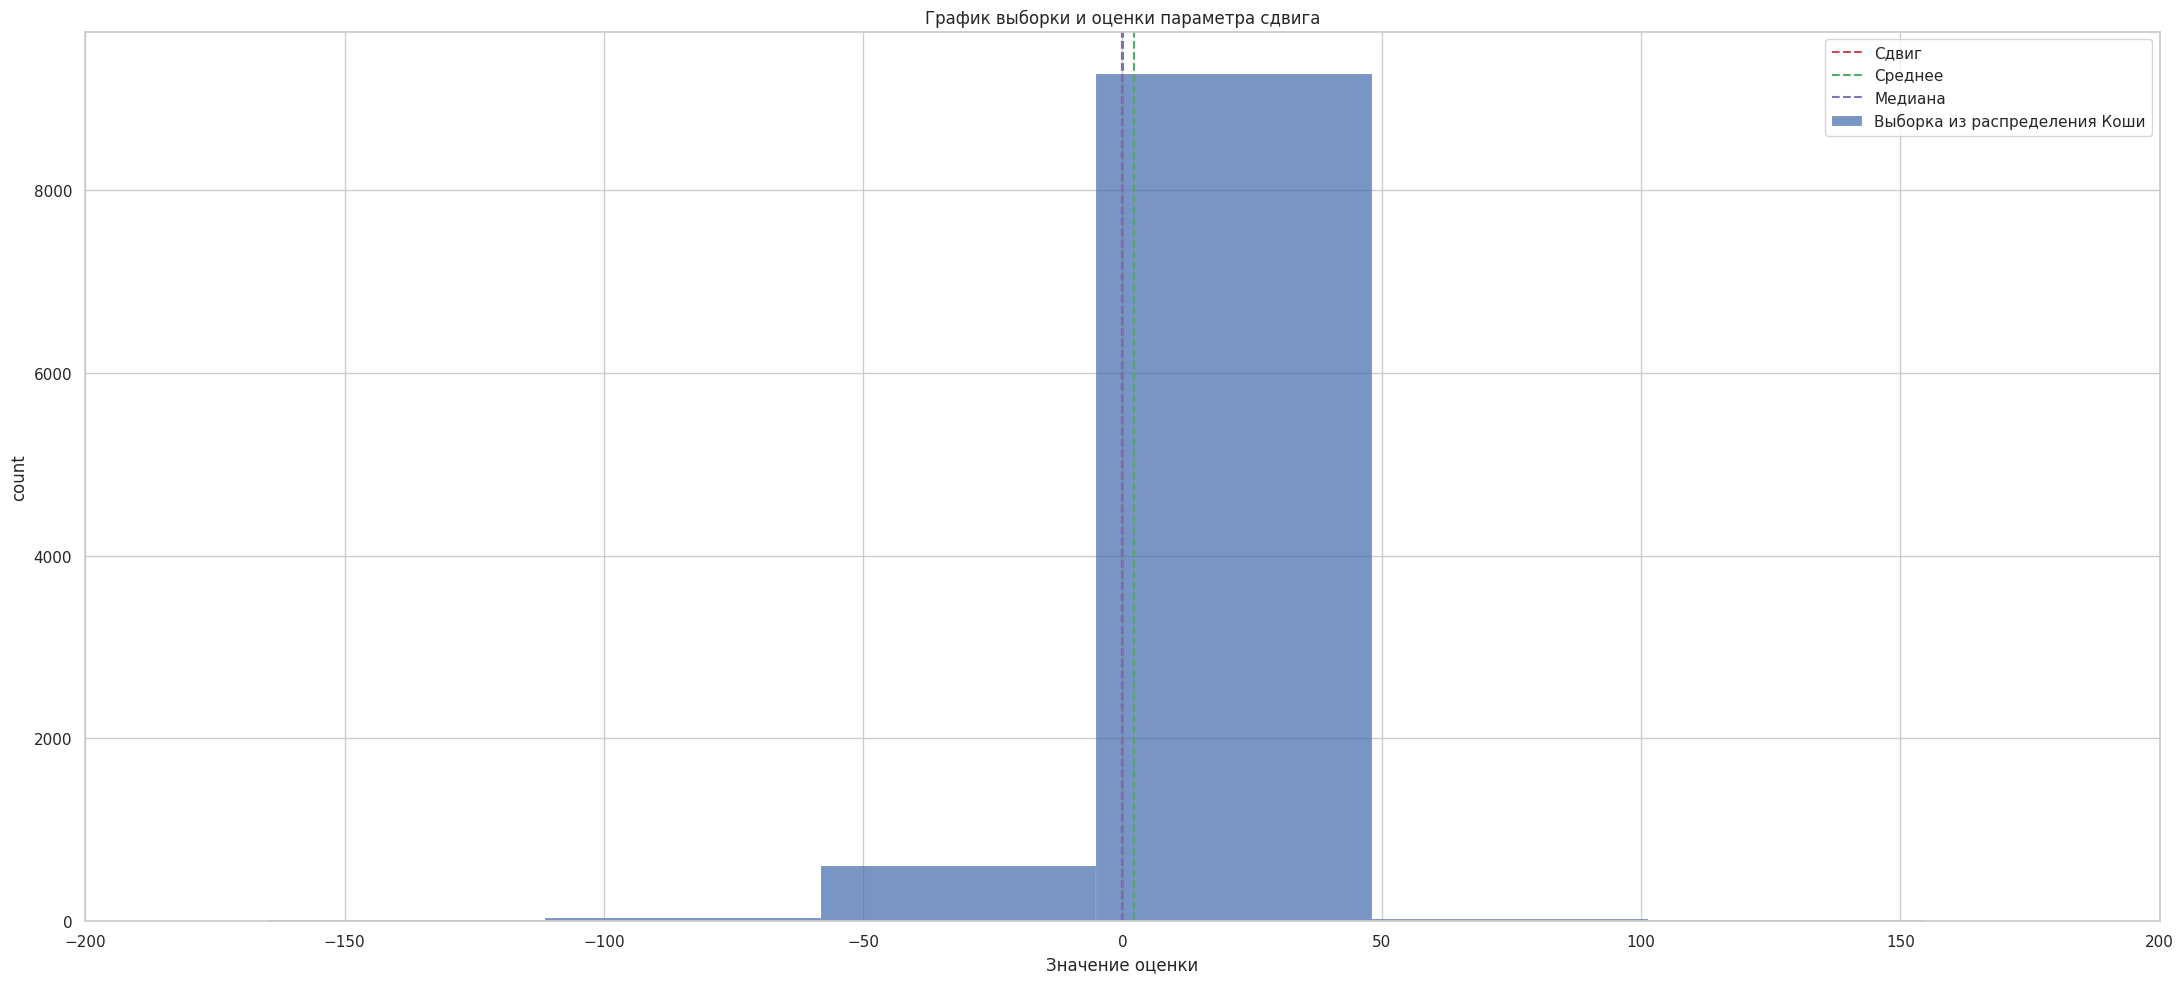

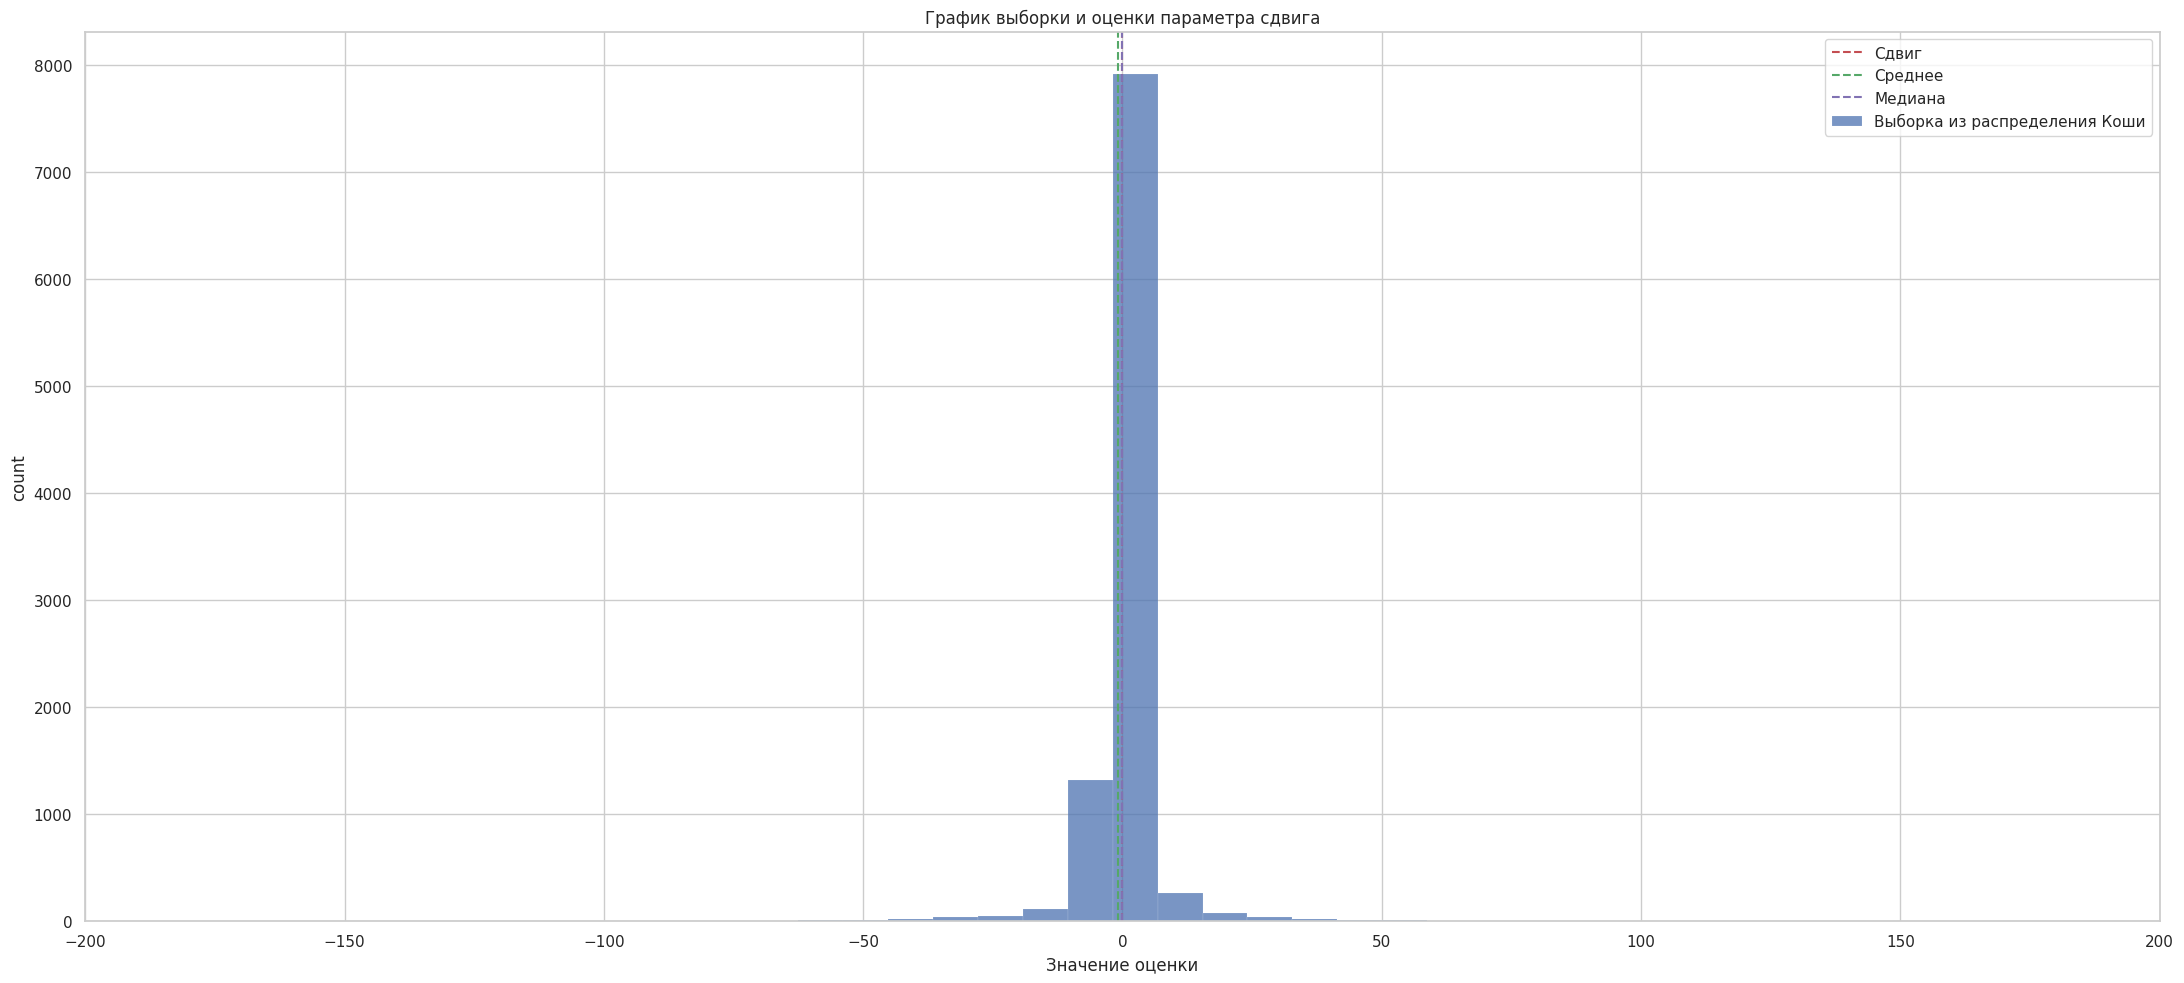

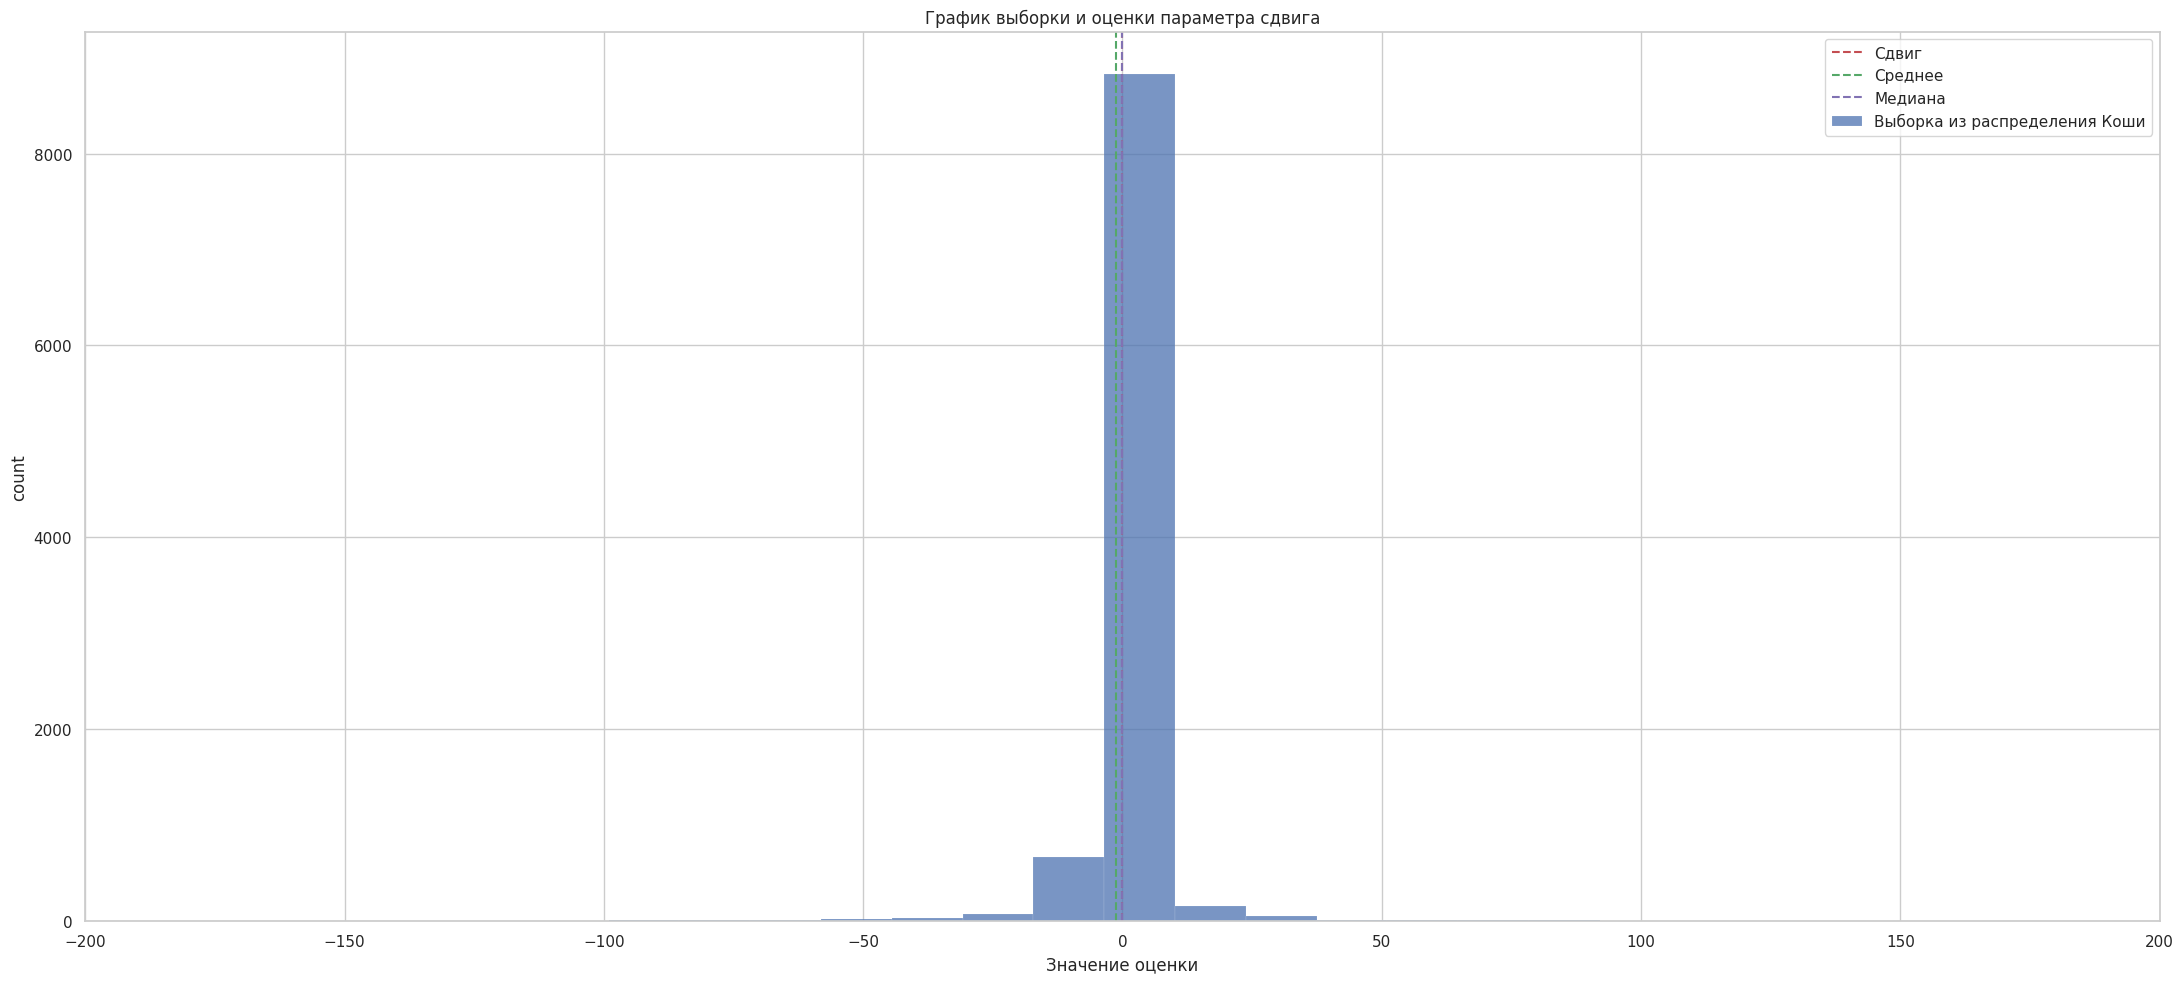

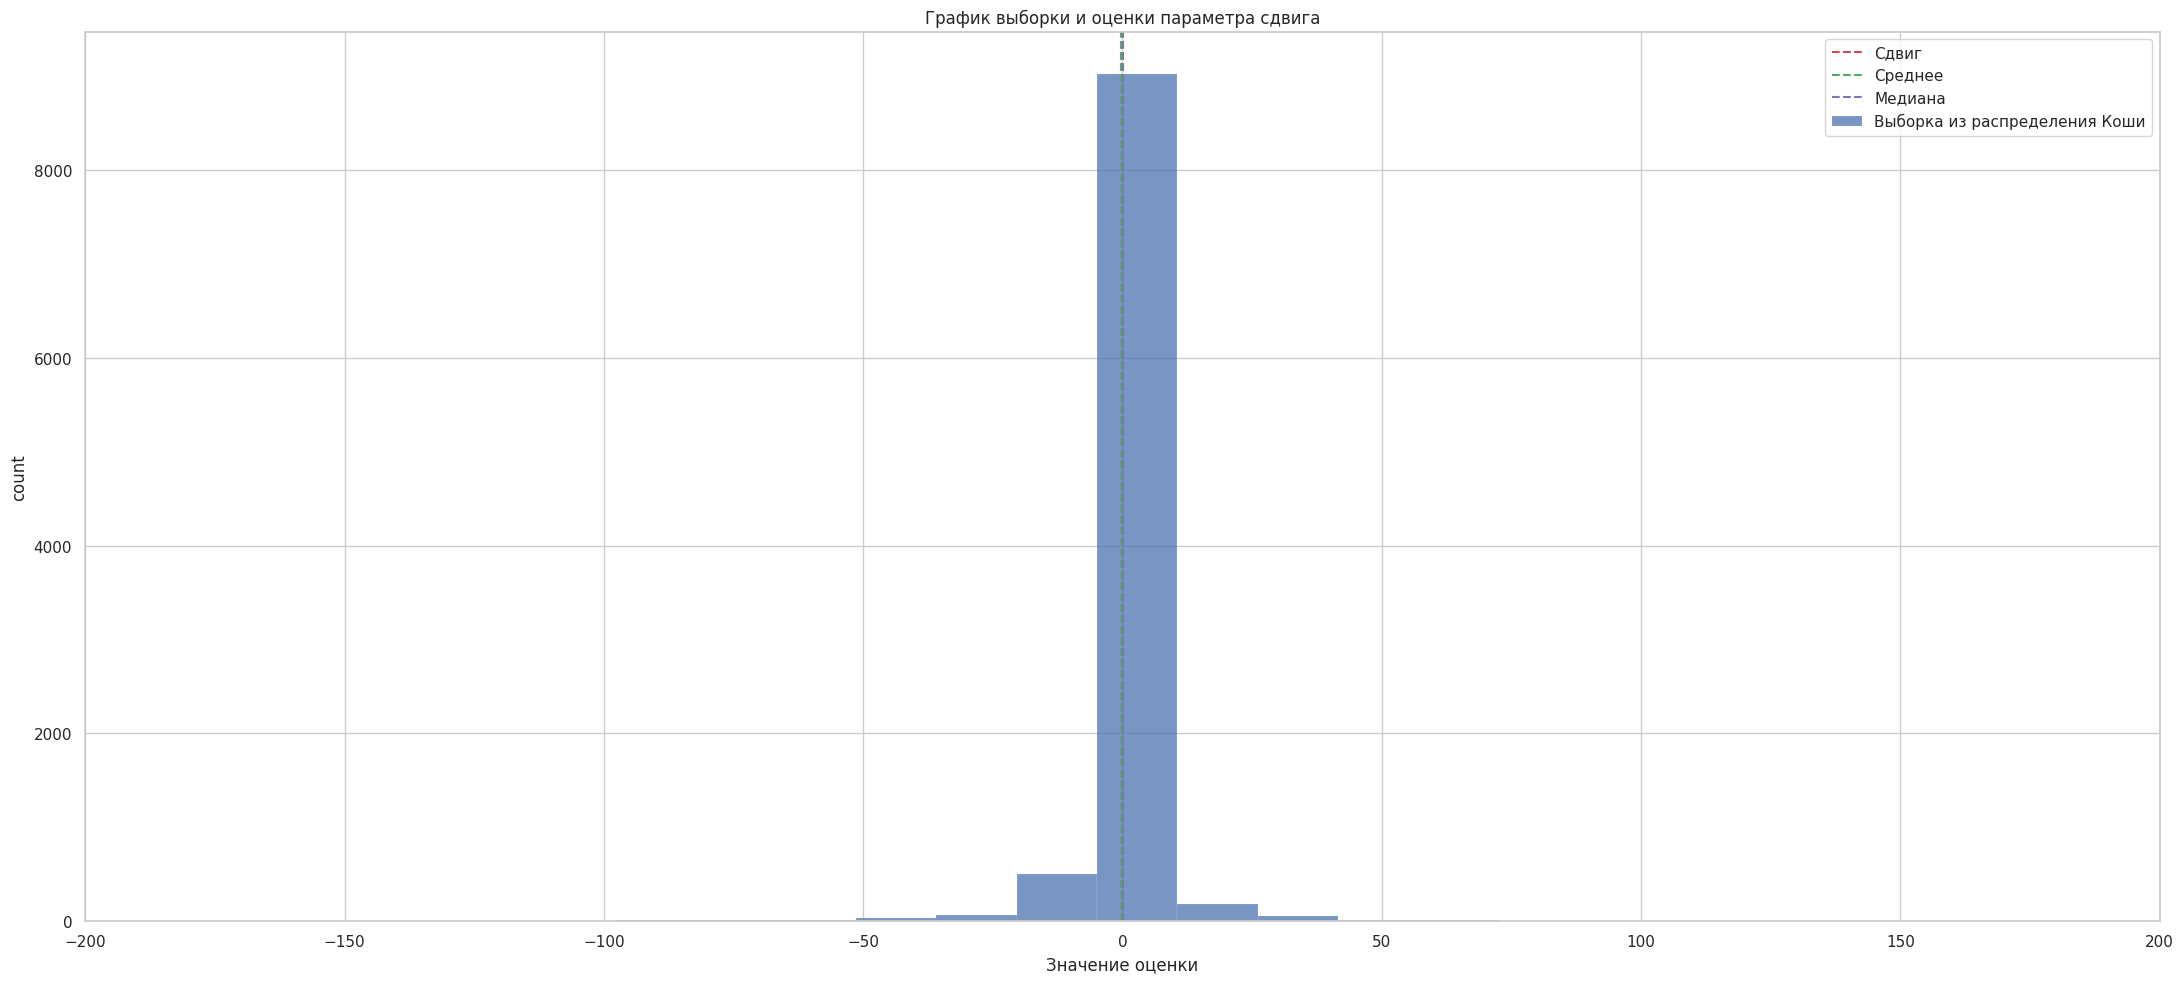

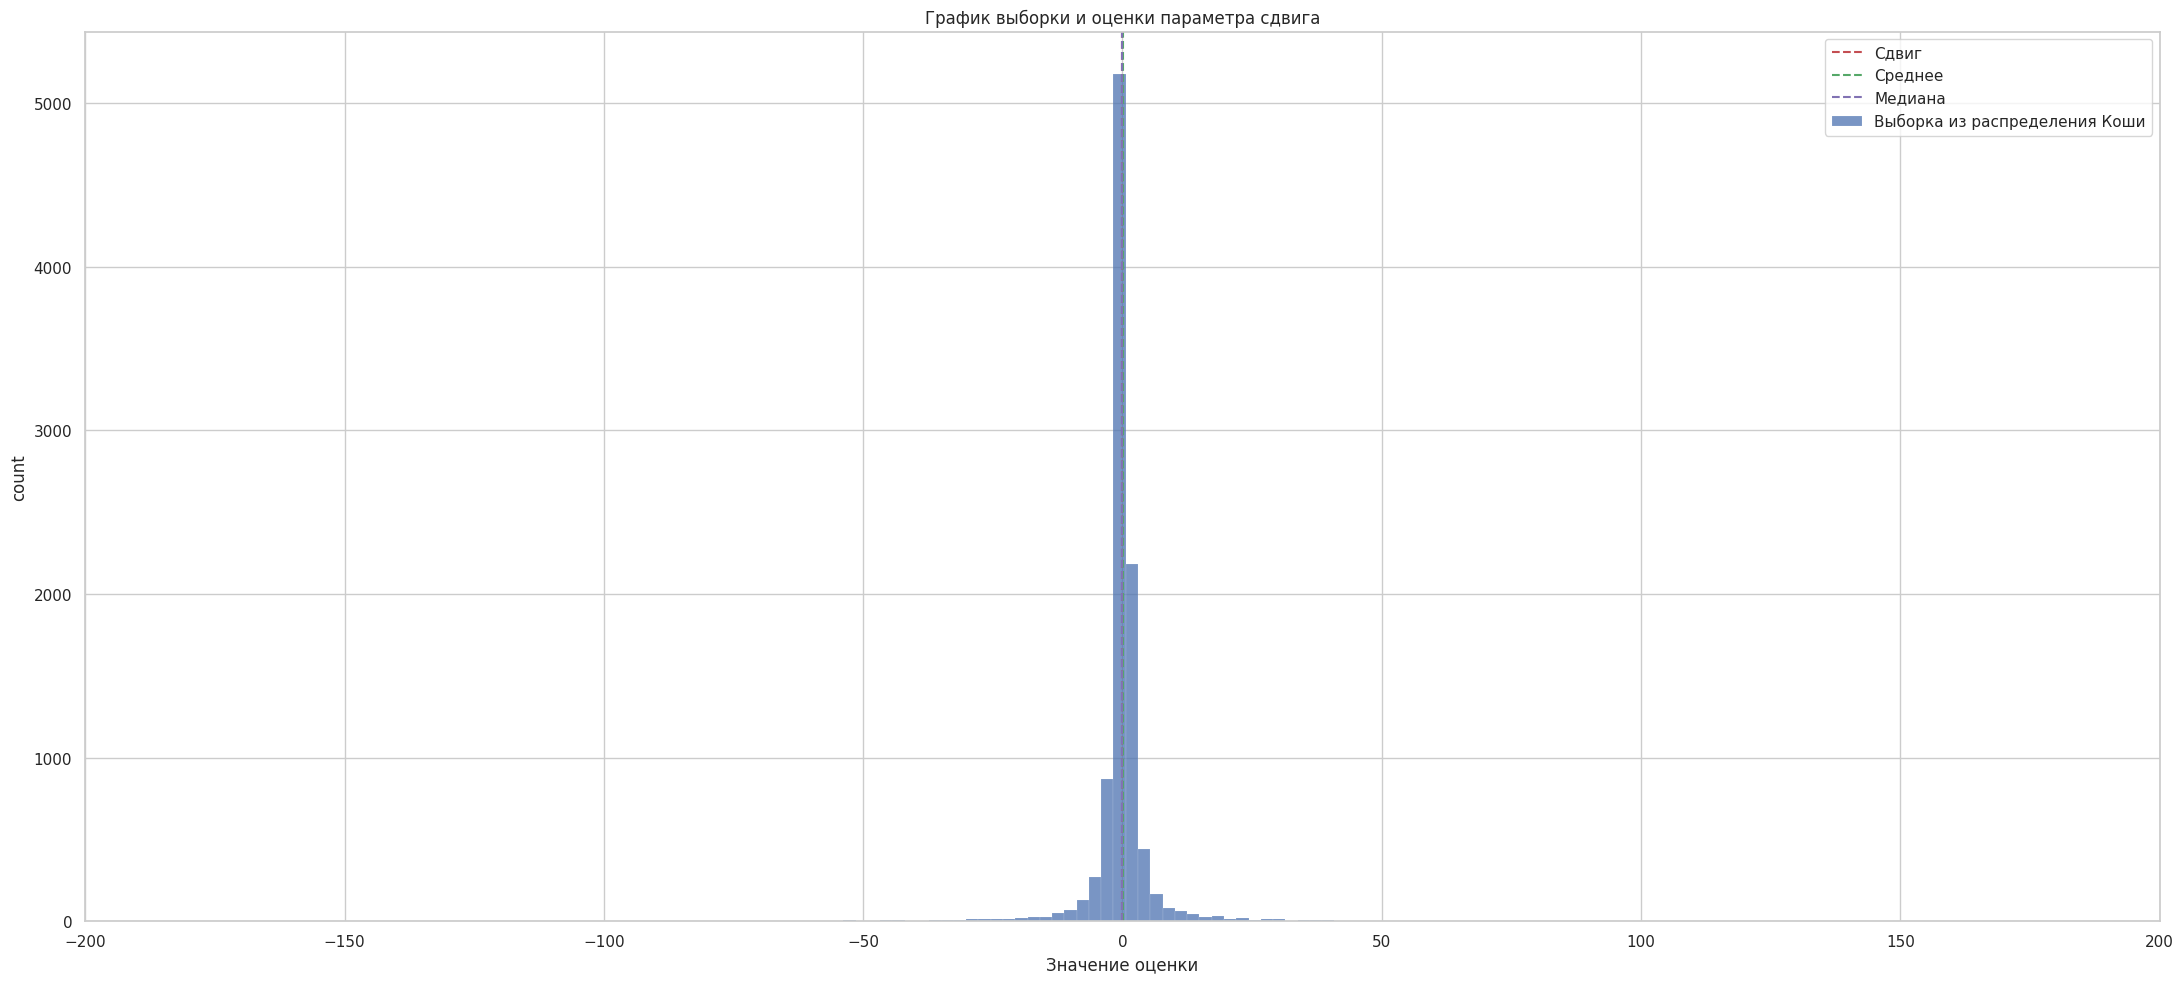

In [ ]:
# Построим графики для нескольких выборок что бы убедиться что медиана состоятельная оценка
for _ in range(5):
  X_caushy = sps.cauchy.rvs(loc = shift, scale = 1, size=N)
  X_mean = np.mean(X_caushy)
  X_median = np.median(X_caushy)
  # Построим графики
  sns.set(style="whitegrid")  # Выбираем стиль  для графиков
  plt.figure(figsize=(22, 10))
  # plt.plot(X_caushy, label="Выборка из распределения Коши")
  sns.histplot(X_caushy, bins=1300, label = f"Выборка из распределения Коши")
  # нанесем на график то что посчитали выше
  plt.axvline(shift, color='r', linestyle='--', label='Сдвиг')
  plt.axvline(X_mean, color='g', linestyle='--', label='Среднее')
  plt.axvline(X_median, color='m', linestyle='--', label='Медиана')
  # plt.ylim(0,8000)
  plt.xlim(-200,200)
  plt.legend()
  plt.title(f'График выборки и оценки параметра сдвига')
  plt.xlabel('Значение оценки')
  plt.ylabel('count')
  plt.tight_layout()
  plt.show()

Из графика видно, что среднее значение является более чувствительным к выбросам(почти во всех случаея оценка сместилась вправо/влево от сдвига = 0), в то время как медиана является более устойчивой оценкой в случае когда у распределения тяжелый хвост как например у распределения Коши.

Получается что, лучшие ассимптотические свойства имеет медиана.
Она является состоятельной, то есть с увеличением размера выборка меньше отклоняется от значения параметра(в данном случае 0) и ассимптотически нормальной. Убедимся в этом построив графики для разных размеров выборки


[]

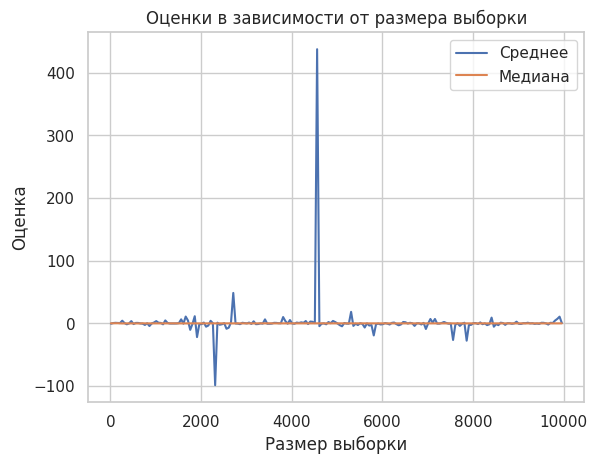

In [ ]:
# теперь построим график для выборок разных размеров
sample_size = list(range(10, N, 50))
mean = []
median = []
for i, size_ in enumerate(sample_size):
  X_caushy = sps.cauchy.rvs(loc = shift, scale = 1, size=size_)
  mean.append(np.mean(X_caushy[:size_]))
  median.append(np.median(X_caushy[:size_]))

plt.plot(sample_size, mean, label = "Среднее")
plt.plot(sample_size, median, label = "Медиана")

plt.title("Оценки в зависимости от размера выборки")
plt.xlabel("Размер выборки")
plt.ylabel("Оценка")
plt.legend()
plt.plot()


Из графика выше видно, что медиана действительно является ассимптотически нормальной оценкой для распределения Коши.

**Изучите эмпирическое распределение выборочной дисперсии для распределения Коши и проверьте состоятельность оценки.**

Для изучения состоятельности оценки выборочной дисперсии в распределении Коши, мы можем провести моделирование, генерируя выборки разных размеров из распределения Коши и оценивая выборочную дисперсию для каждой выборки. Затем мы можем построить эмпирическое распределение оценок выборочной дисперсии и проверить, как оно ведет себя с увеличением размера выборки.

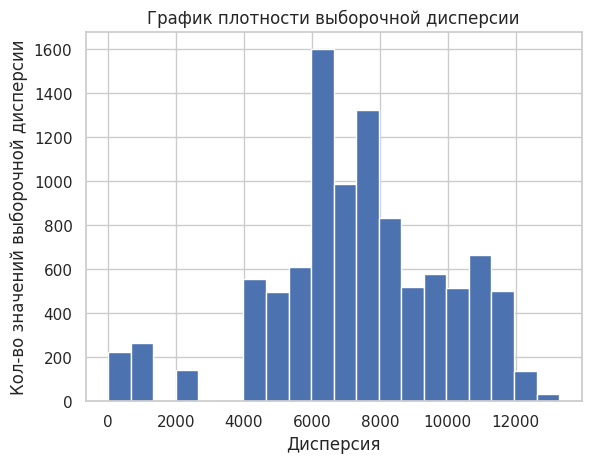

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

sample_size = list(range(100, N, 100))
sigma = []
# for i, size_ in enumerate(sample_size):
X_caushy = sps.cauchy.rvs(loc = shift, size=N)


X_n = np.arange(1, N + 1)
X_c_average = np.cumsum(X_caushy) / X_n
X_c_sm = np.cumsum(X_caushy**2) / X_n
sigma = X_c_sm - (X_c_average**2)
plt.hist(sigma, bins = 20)
plt.title("График плотности выборочной дисперсии")
plt.xlabel("Дисперсия")
plt.ylabel("Кол-во значений выборочной дисперсии")
plt.show()

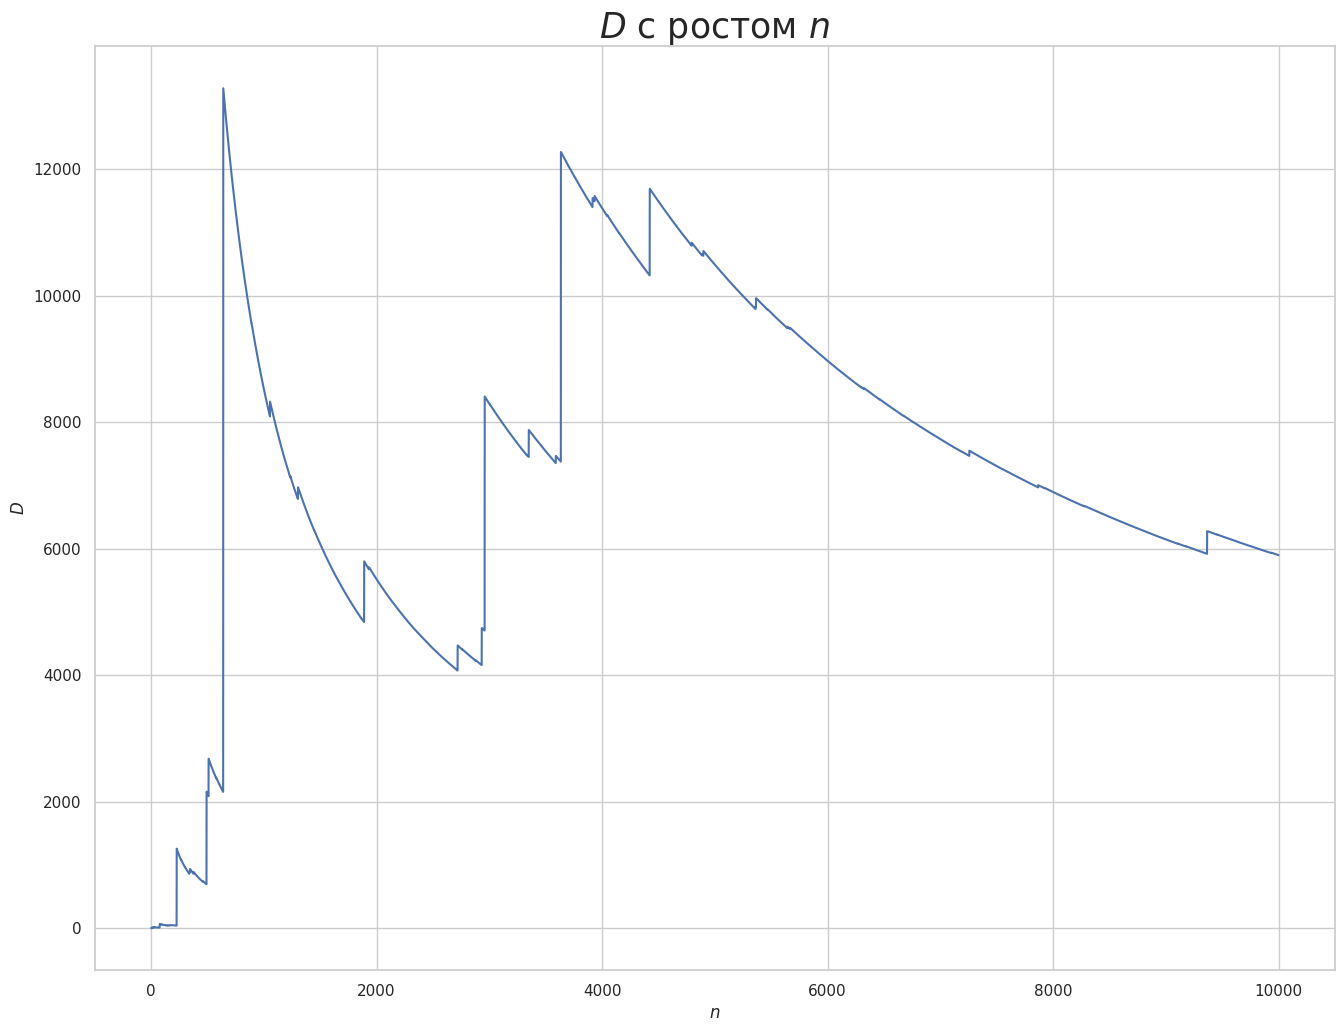

In [ ]:
plt.figure(figsize=(16, 12))
sns.lineplot(x=X_n, y=np.abs(sigma))
plt.title("$D$ с ростом $n$", fontsize=25)
plt.ylabel("$D$")
plt.xlabel("$n$")
plt.show()

**Вывод:**
Из последнего графика видно что выборочная дисперсия не сходится к чему-либо => оценка не является состоятельной, так же можно сказать что раз дисперсия не сходится, значит мы подтвердили ее отсутствие у распределения Коши.

### Задача 4

Древние свитки из Сареотской библиотеки хранят знания двух древних волшебников севера --- Гливенко и Кантелли. Два мага-гностика придумали ультимативный способ оценивания распределений количества чего угодно. Их способом пользовались короли севера ещё две тысячи лет назад, во времена Первой Ордалии. Аспект-Император отдал приказ проверить, верны ли их выкладки до сих пор.

Сгенерируйте $N$ выборок $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [ ]:
np.random.seed(42)

In [ ]:
theta = 1
N = int(1e4)
norm_samples = sps.norm.rvs(loc=0, scale=theta, size=(N, N))

Для всех $n \leqslant N$ первой выборки посчитайте эмпирическую функцию распределения.


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary
ecdf = [ECDF(norm_samples[0][0 : i + 1]) for i in range(N)]

# ecdfs: typing.List[ECDF] = [ECDF(norm_samples[:i]) for i in range(1, N + 1)]

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

Проверьте выполнение теоремы Гливенко-Кантелли.

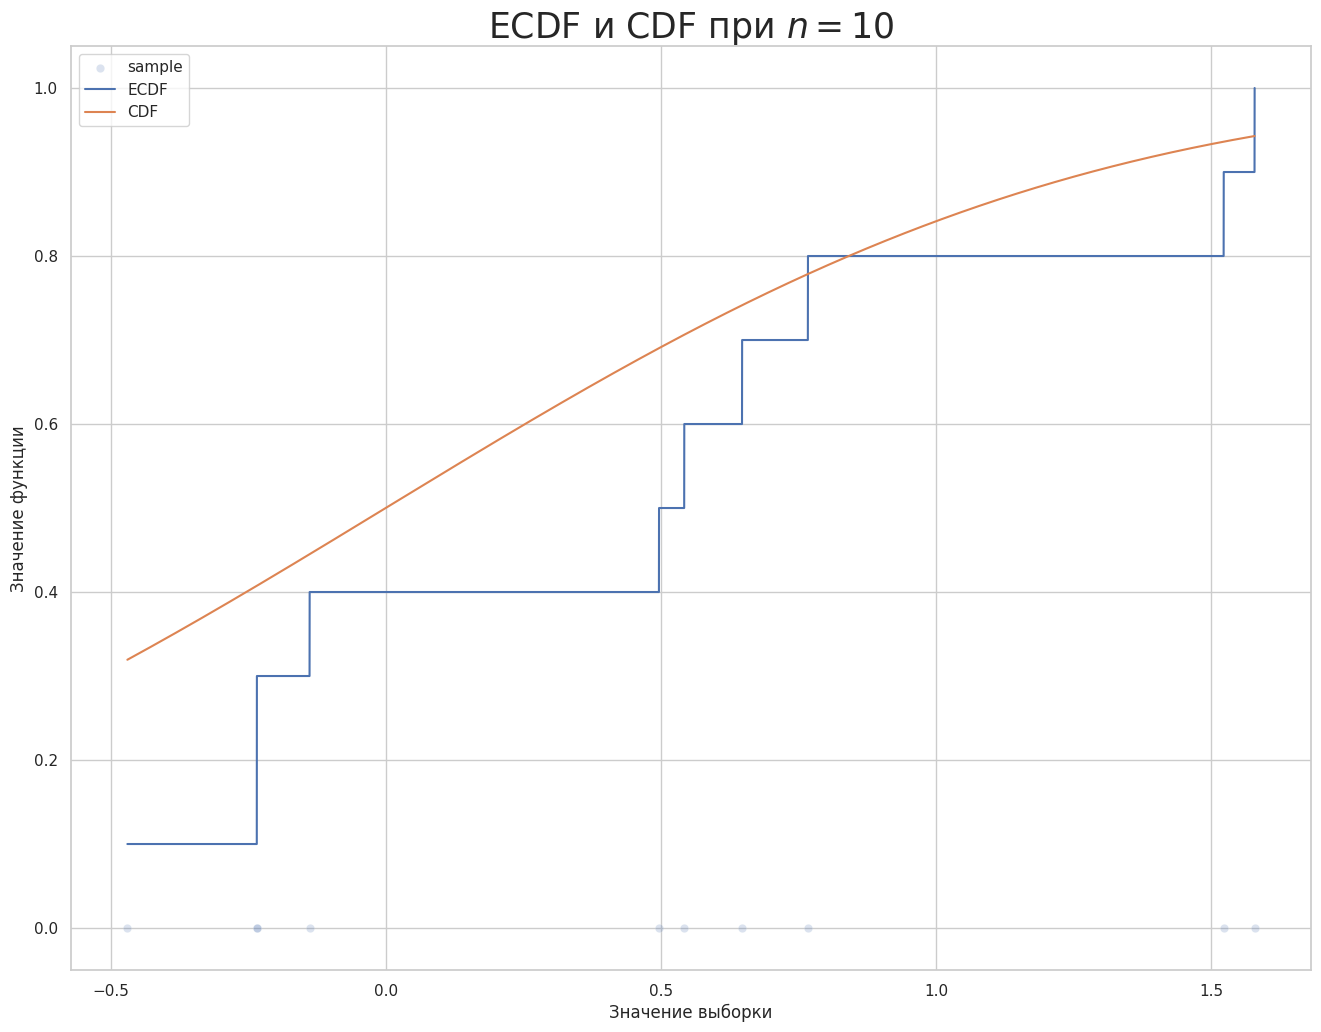

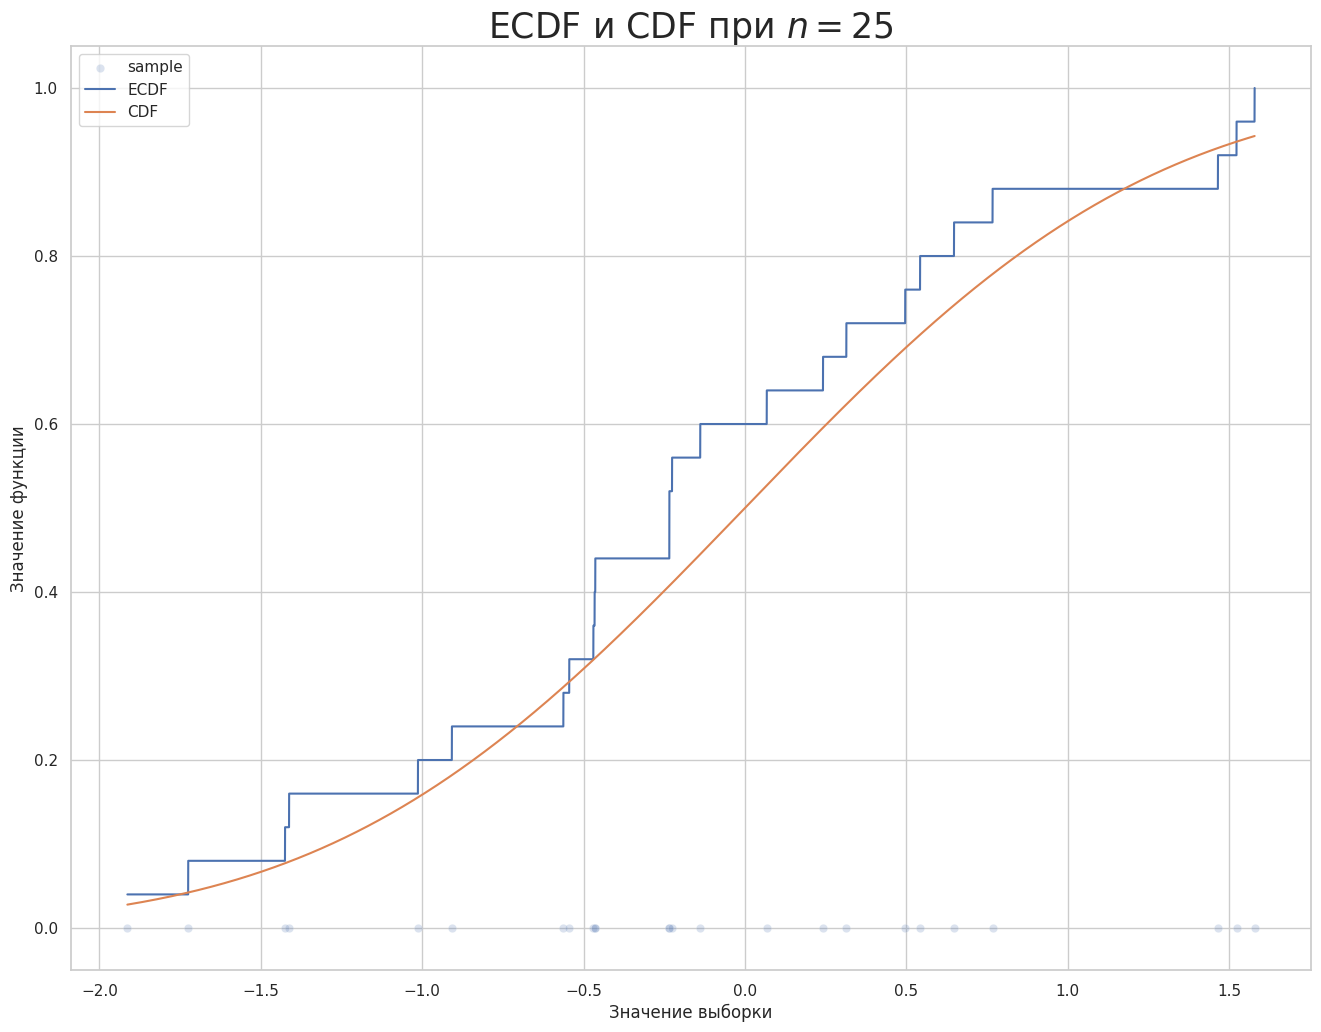

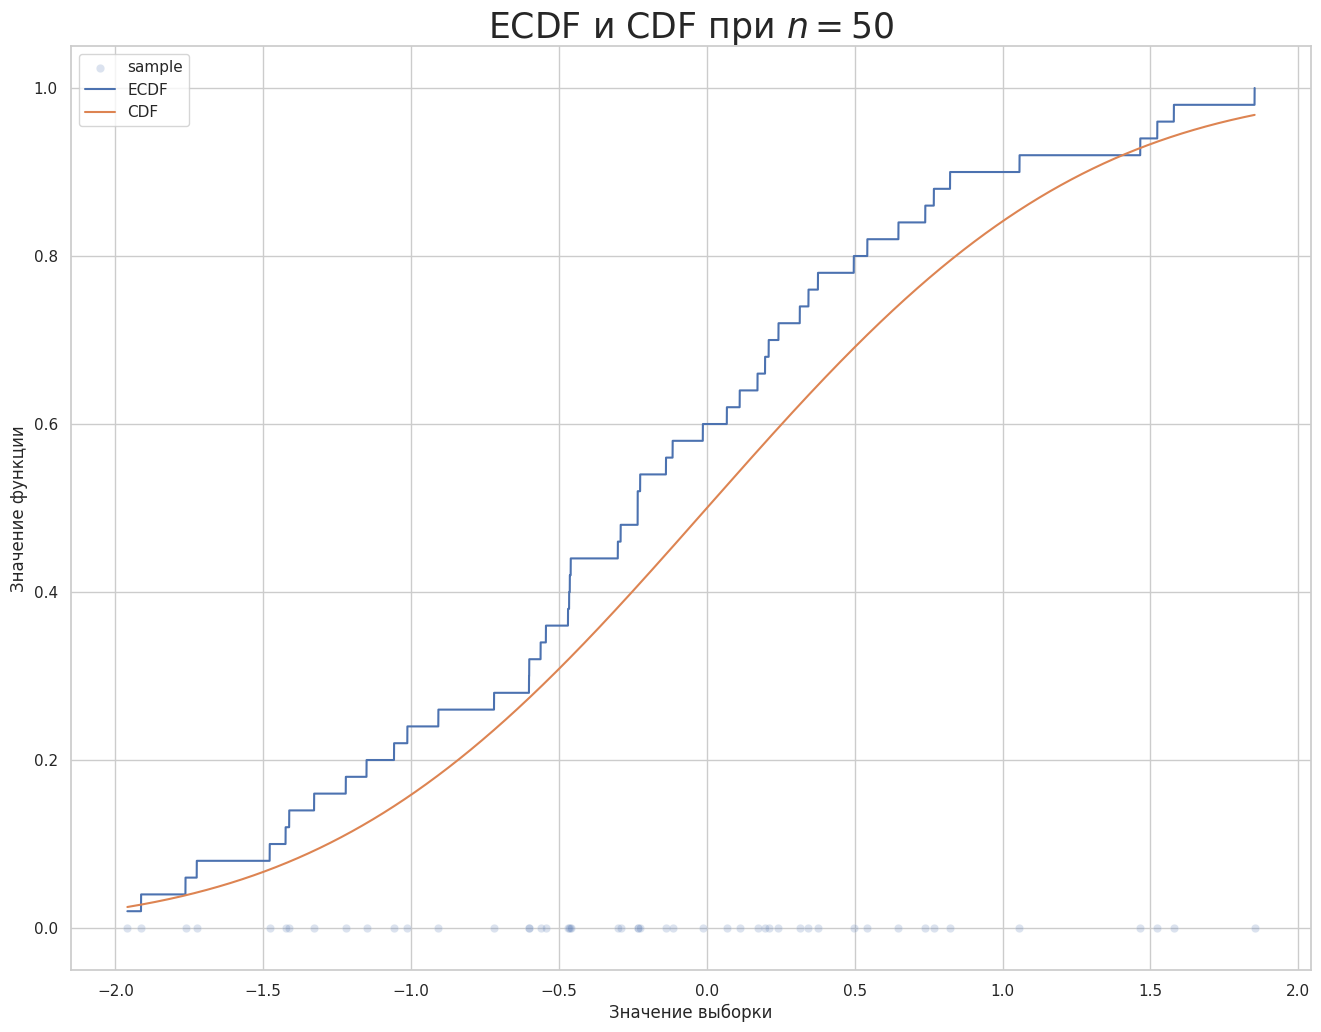

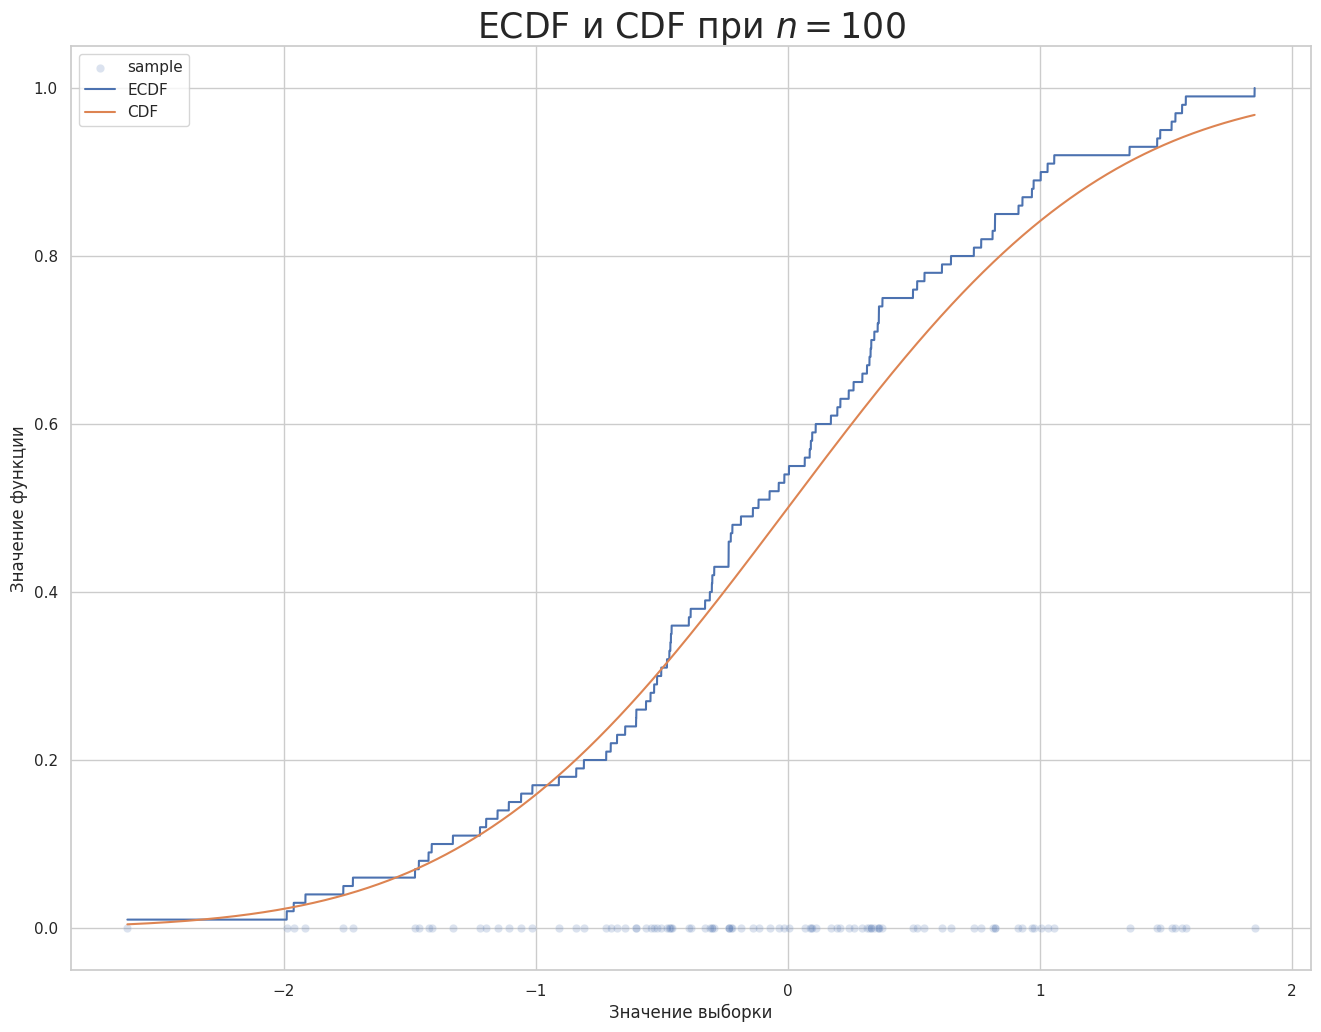

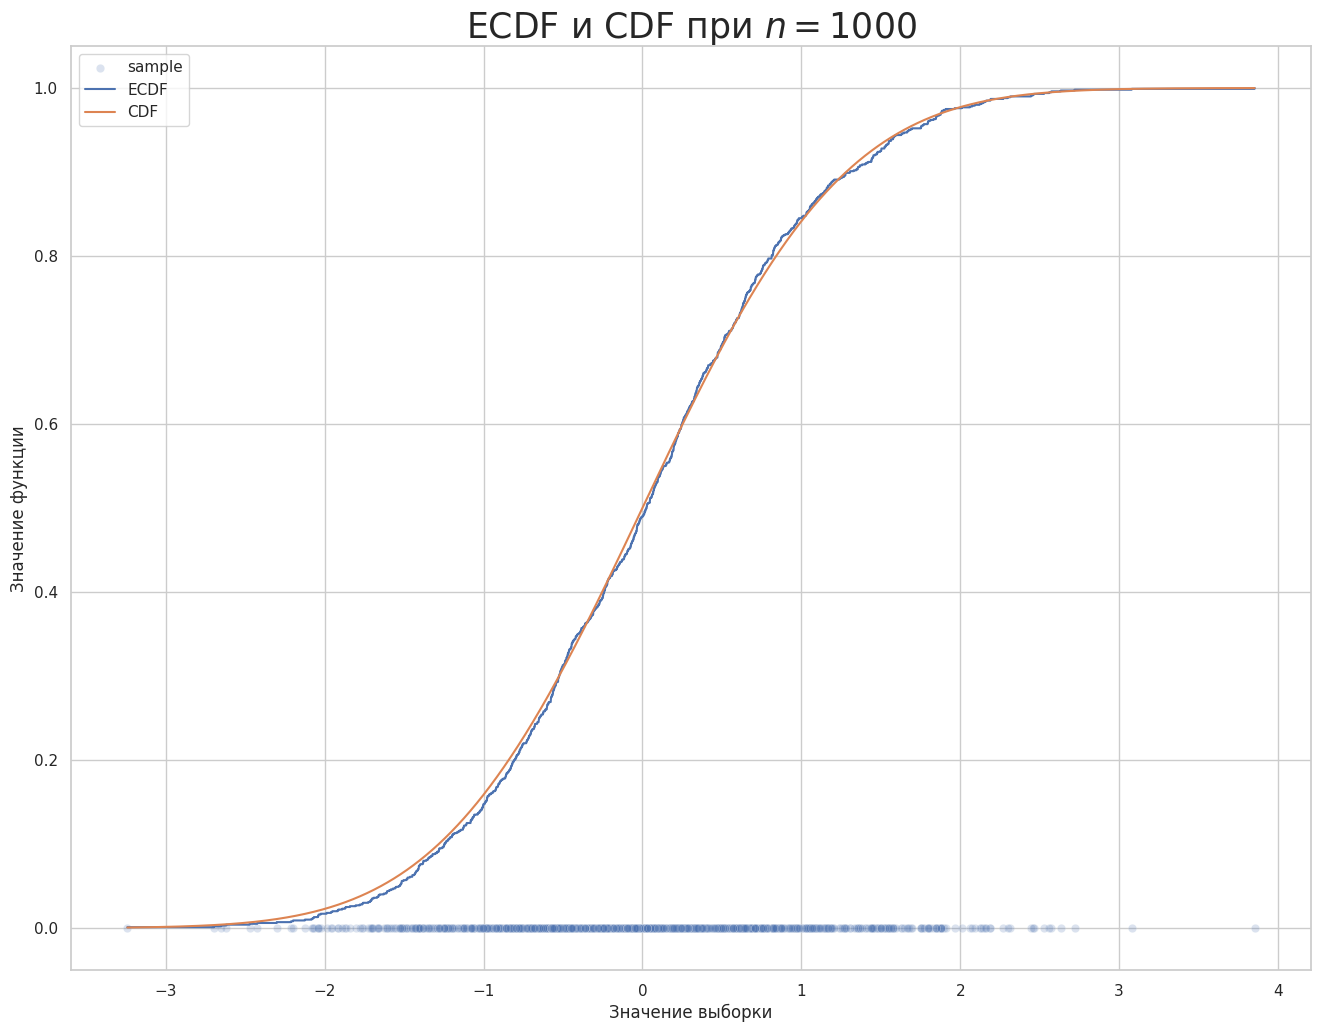

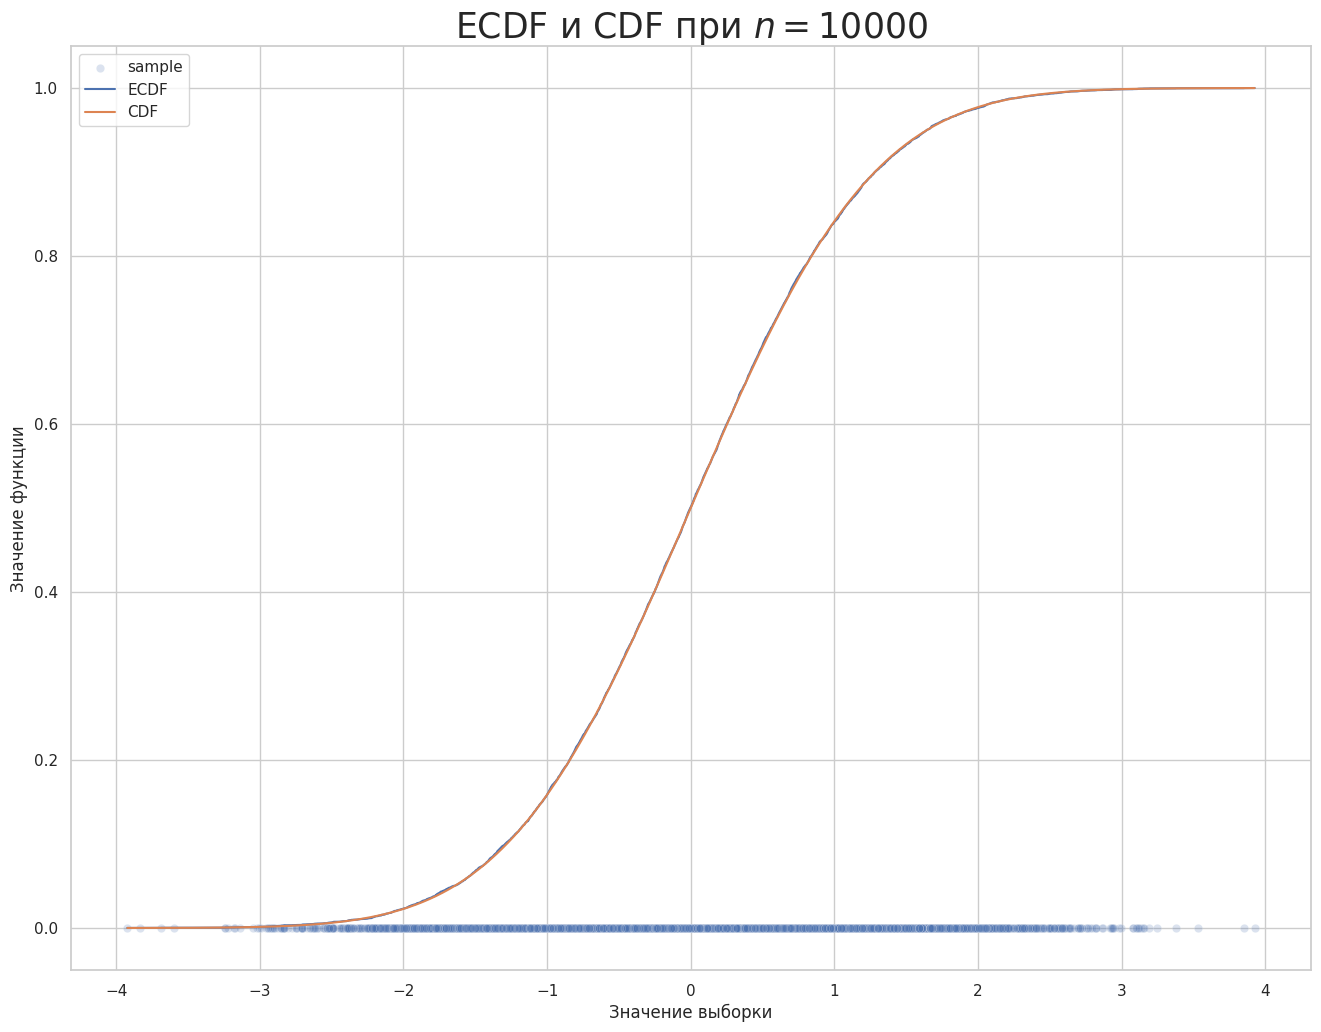

In [ ]:
for i, n in enumerate([10,25,50,100,1000,N]):
  X_ = np.linspace(np.min(norm_samples[0][0:n]), np.max(norm_samples[0][0:n]), N)
  Y_ = np.zeros(n)
  plt.figure(figsize=(16,12))
  sns.scatterplot(x=norm_samples[0][0:n], y = Y_, alpha=0.2, label='sample')
  plt.plot(X_, ecdf[n - 1](X_), label='ECDF')
  plt.plot(X_, sps.norm.cdf(X_), label='CDF')
  plt.legend()
  plt.title(f"ECDF и CDF при $n={n}$", fontsize=25)
  plt.ylabel("Значение функции")
  plt.xlabel("Значение выборки")
  plt.show()


Из графика видно, что чем больше n, тем больше наша функция приближена к истинной функции распределения

Для всех $n ≤ N$ посчитайте значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ для первой выборки. Промоделируйте поведение статистики $\sqrt{n}D_n$. К чему сходится распределение (на графиках)? К чему сходится в теории?


In [ ]:
D_n = []
est = []
for n in range(0, N):
    sup = np.max(np.abs(ecdf[n].y - sps.norm.cdf(ecdf[n].x)))
    D_n.append(sup)
    est.append(np.sqrt(n + 1)*sup)

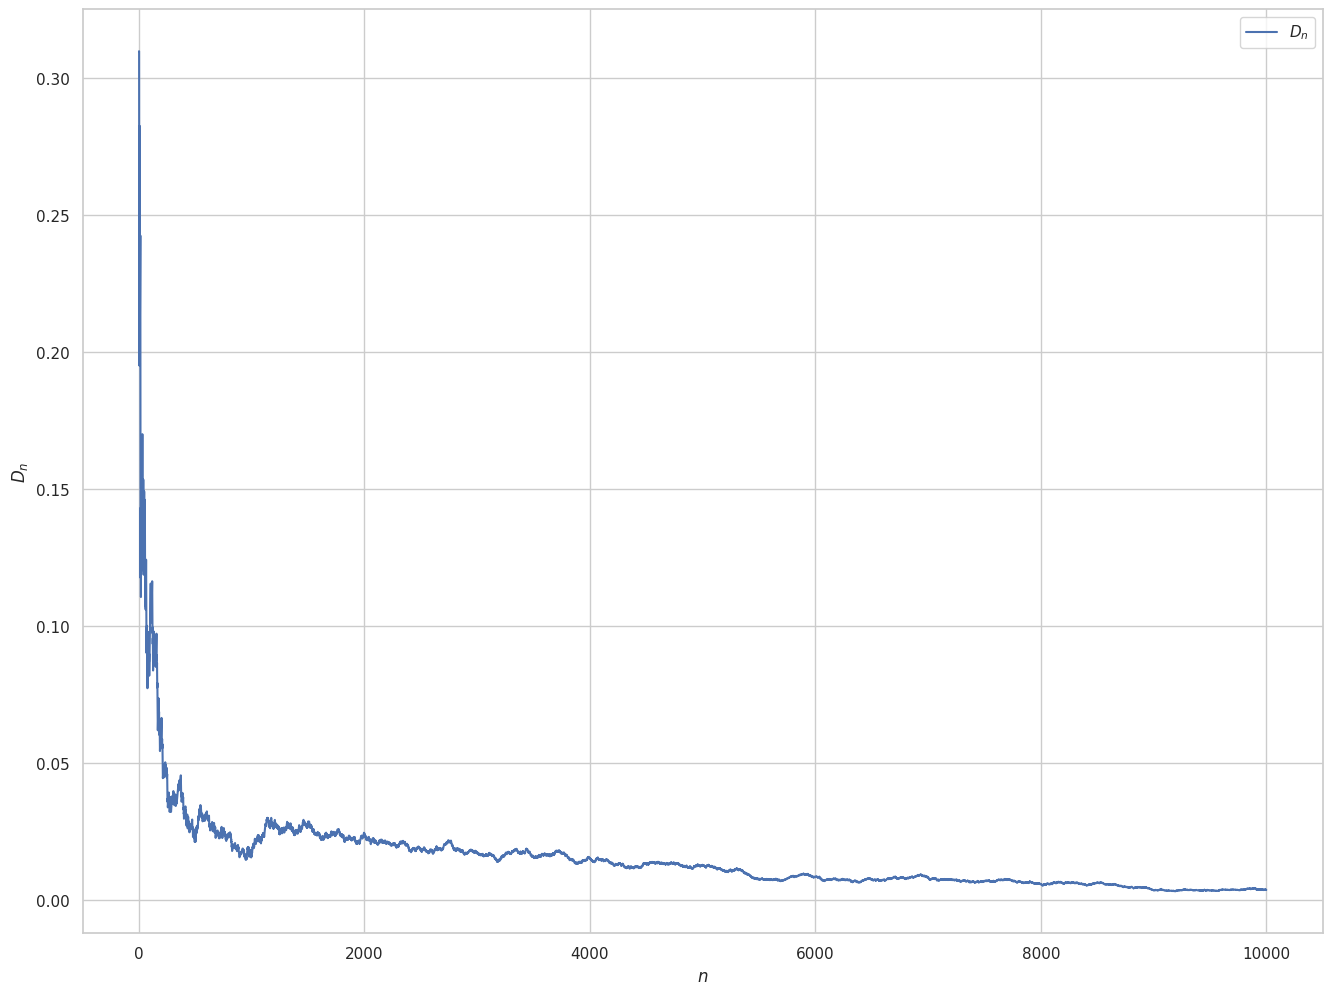

In [ ]:
n_ = np.arange(1, N + 1)
plt.figure(figsize=(16,12))
plt.plot(n_, D_n, label = "$D_n$")
plt.legend()
plt.xlabel("$n$")
plt.ylabel("$D_n$")
plt.show()

**Вывод:** На графике можно увидеть, что с ростом $n$ $D_n$ стремитс к 0, что соответсвует теореме Гливенко-Кантелли, которая утверждает, что $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)| \rightarrow_{п.н} 0$ при ${n → ∞}$



Теперь промоделируем поведение статистики $\sqrt{n}D_n$. К чему сходится распределение (на графиках)?

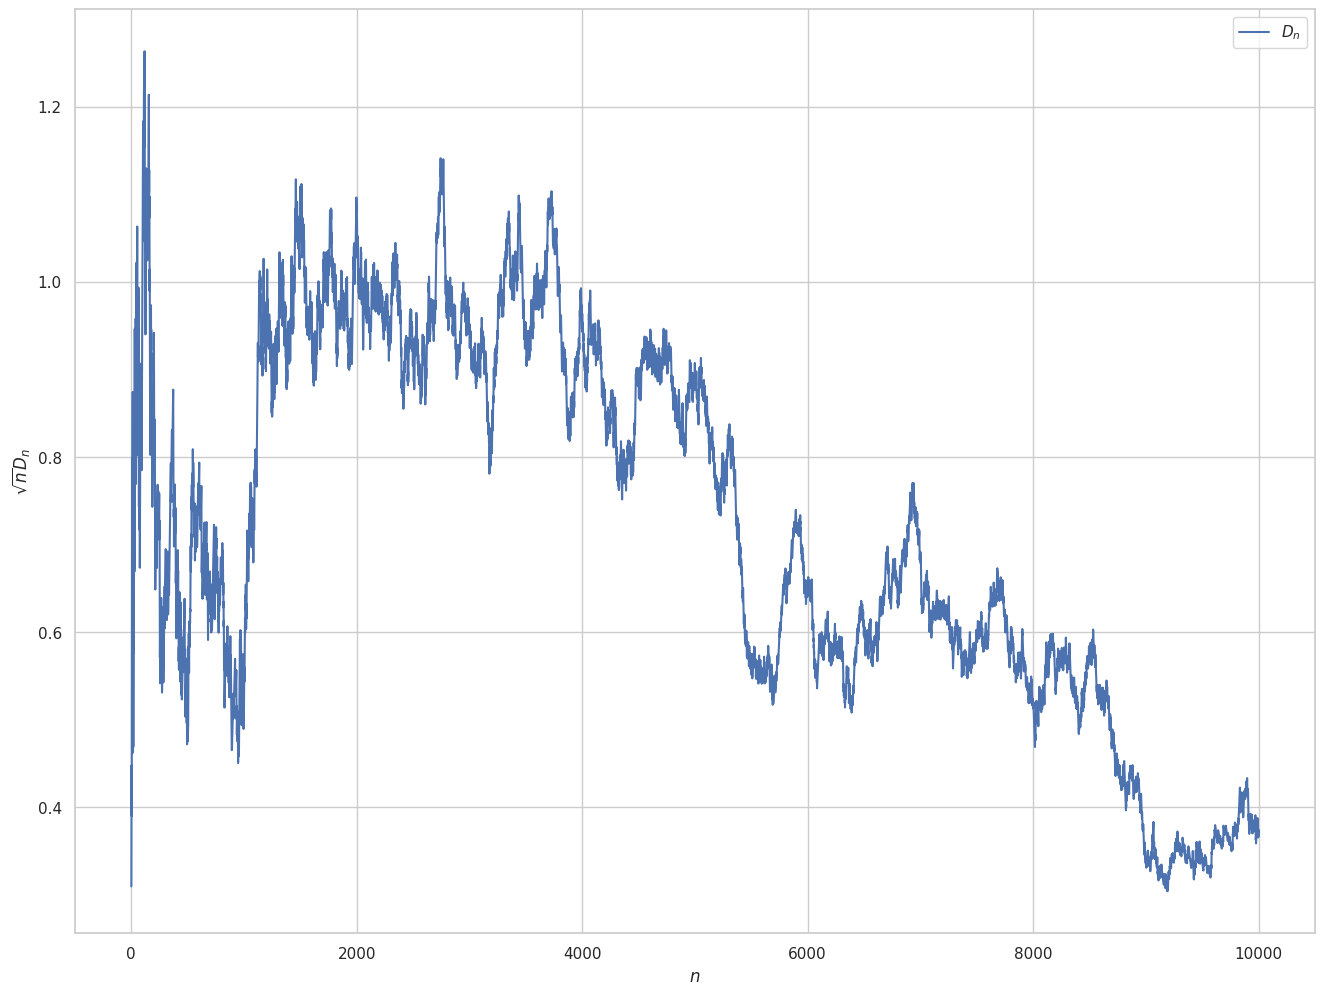

In [ ]:
n_ = np.arange(1, N + 1)
plt.figure(figsize=(16,12))
plt.plot(n_, est, label = "$D_n$")
plt.legend()
plt.xlabel("$n$")
plt.ylabel("$\\sqrt{n}D_n$")
plt.show()

Значение на графике $\sqrt(n)D_n$ имеет предельное распределение. Попробуем выяснить теоретически


$D_n = \sup_{x \in \mathbb{R}} |\hat{F}_n(x) - F(x)|$

умножим обе стороны на \(\sqrt{n}\):

$\sqrt{n} \cdot D_n = \sqrt{n} \cdot \sup_{x \in \mathbb{R}} |\hat{F}_n(x) - F(x)|$

Согласно теореме Гливенко-Кантелли, эмпирическая функция распределения $\hat{F}_n(x)$ сходится почти наверное к теоретической функции распределения $F(x)$ при $n \rightarrow \infty$.


$\sqrt{n} \cdot \sup_{x \in \mathbb{R}} |\hat{F}_n(x) - F(x)| \xrightarrow{a.s.} 0$

Это означает, что c ростом $n$ статистика $\sqrt{n} \cdot D_n$ сходится почти наверное к нулю.


### Задача 5

Оказывается, нельзя оценивать распределения оценок на глаз простым всматриванием в графики! Поэтому гностики из крепости Нрон изобрели новое заклинание -- QQ-plot. В этой задаче Вам предстоит научиться проверять распределения на принадлежность семействам при помощи этого инструмента.

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Моделированием статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ изучите их распределение. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [ ]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

theta = 1
X = sps.uniform.rvs(loc=0, scale=theta, size=(N_samples, N))

estimate_first = 2 * np.mean(X, axis=1)
estimate_second = ((N + 1)/N) * np.max(X, axis=1)

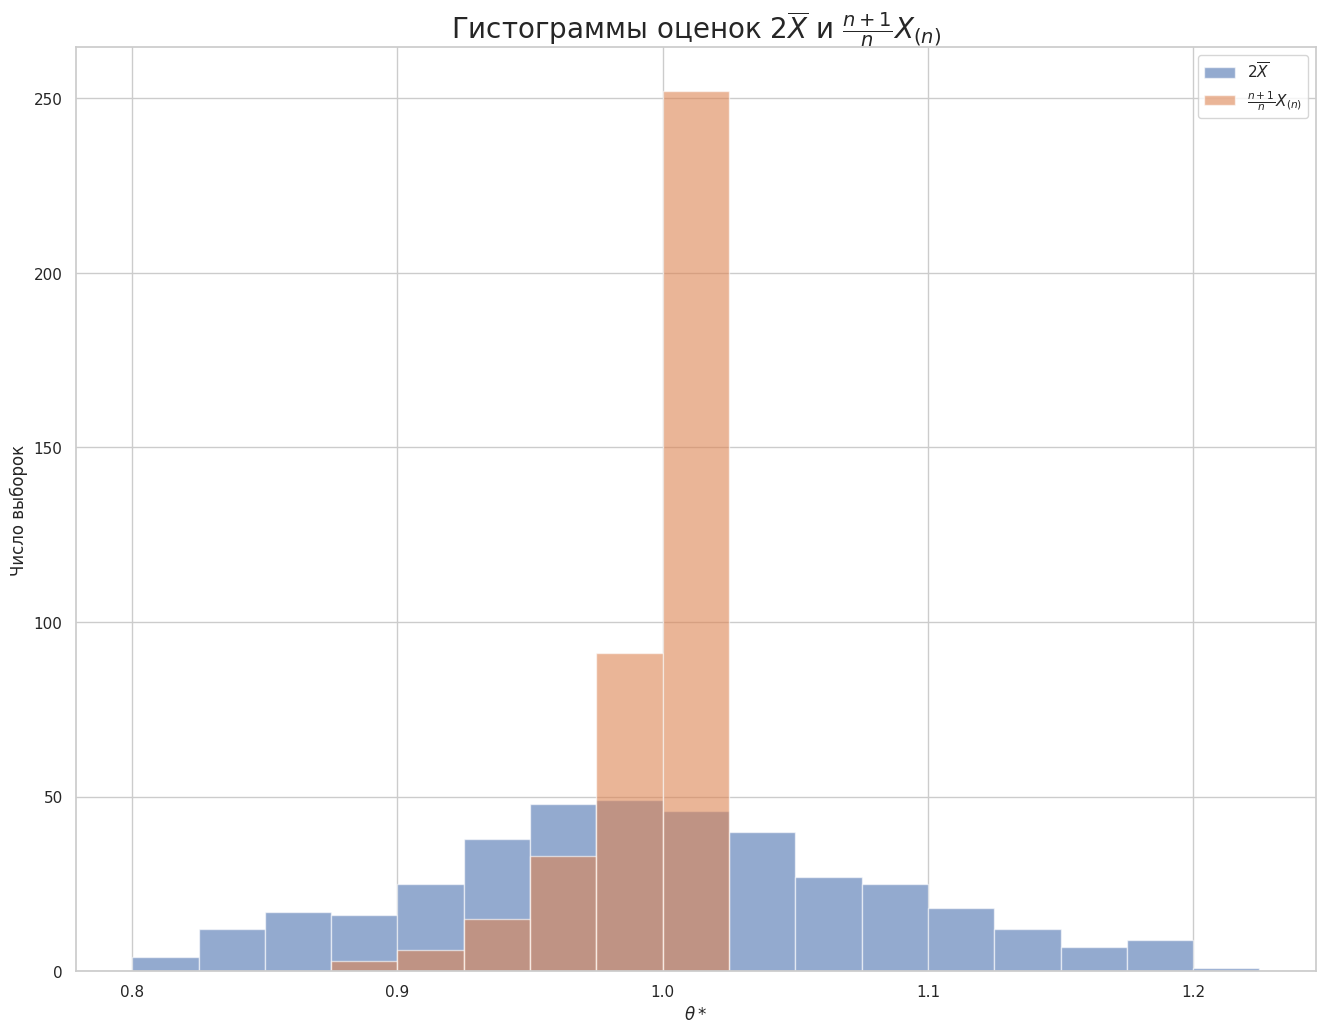

In [ ]:
plt.figure(figsize=(16, 12))
plt.hist(x=estimate_first, bins=bins, alpha=0.6, label=r'$2\overline{X}$')
plt.hist(x=estimate_second, bins=bins, alpha=0.6, label=r'$\frac{n+1}{n} X_{(n)}$')

plt.title("Гистограммы оценок $2\\overline{X}$ и $\\frac{n+1}{n} X_{(n)}$", fontsize=20)
plt.xlabel("$\\theta*$")
plt.ylabel("Число выборок")
plt.legend()
plt.show()

Промоделируйте статистики $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$. К чему сходятся их распределения с ростом $N$?

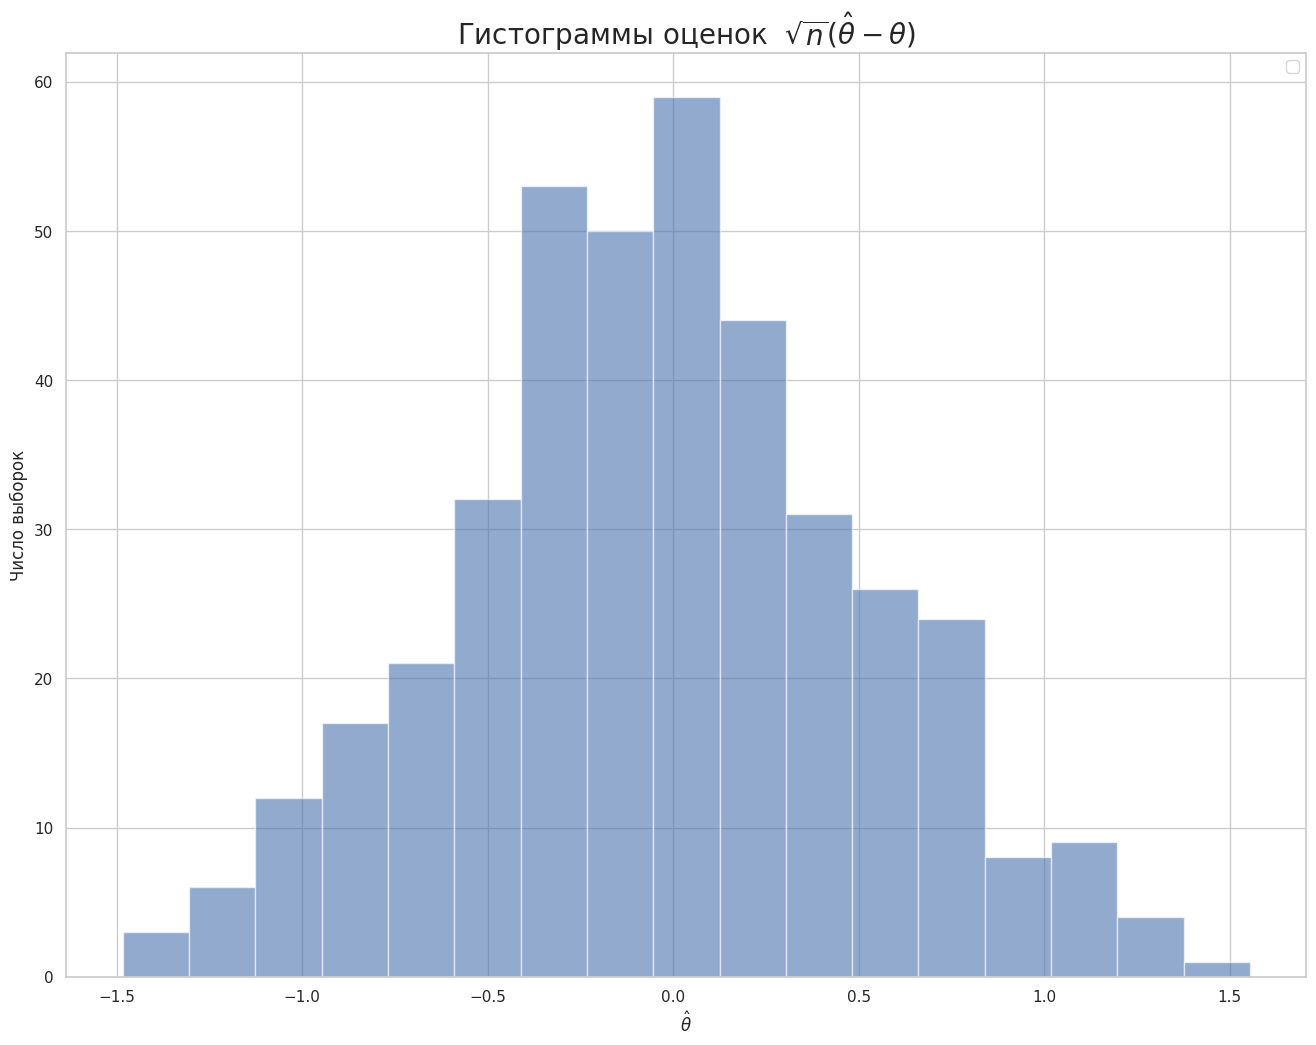

In [ ]:
estimate1 = np.sqrt(N)*(estimate_first - theta)
plt.figure(figsize=(16, 12))
plt.hist(x=estimate1, bins='auto', alpha=0.6)

plt.title("Гистограммы оценок  $\\sqrt{n} (\\hat\\theta - \\theta)$", fontsize=20)
plt.xlabel("$\\hat\\theta$")
plt.ylabel("Число выборок")
plt.legend()
plt.show()

Данная оценка похожа на нормальное распределение, что логично исходя из ее структуры. Тк $E_{\theta}{\overline{2X}}=\theta$

Применяя УЗБЧ, ЦПТ и теорему о производных получим что $\sqrt{n} (\hat\theta - \theta)$ стремится к нормальному распределению

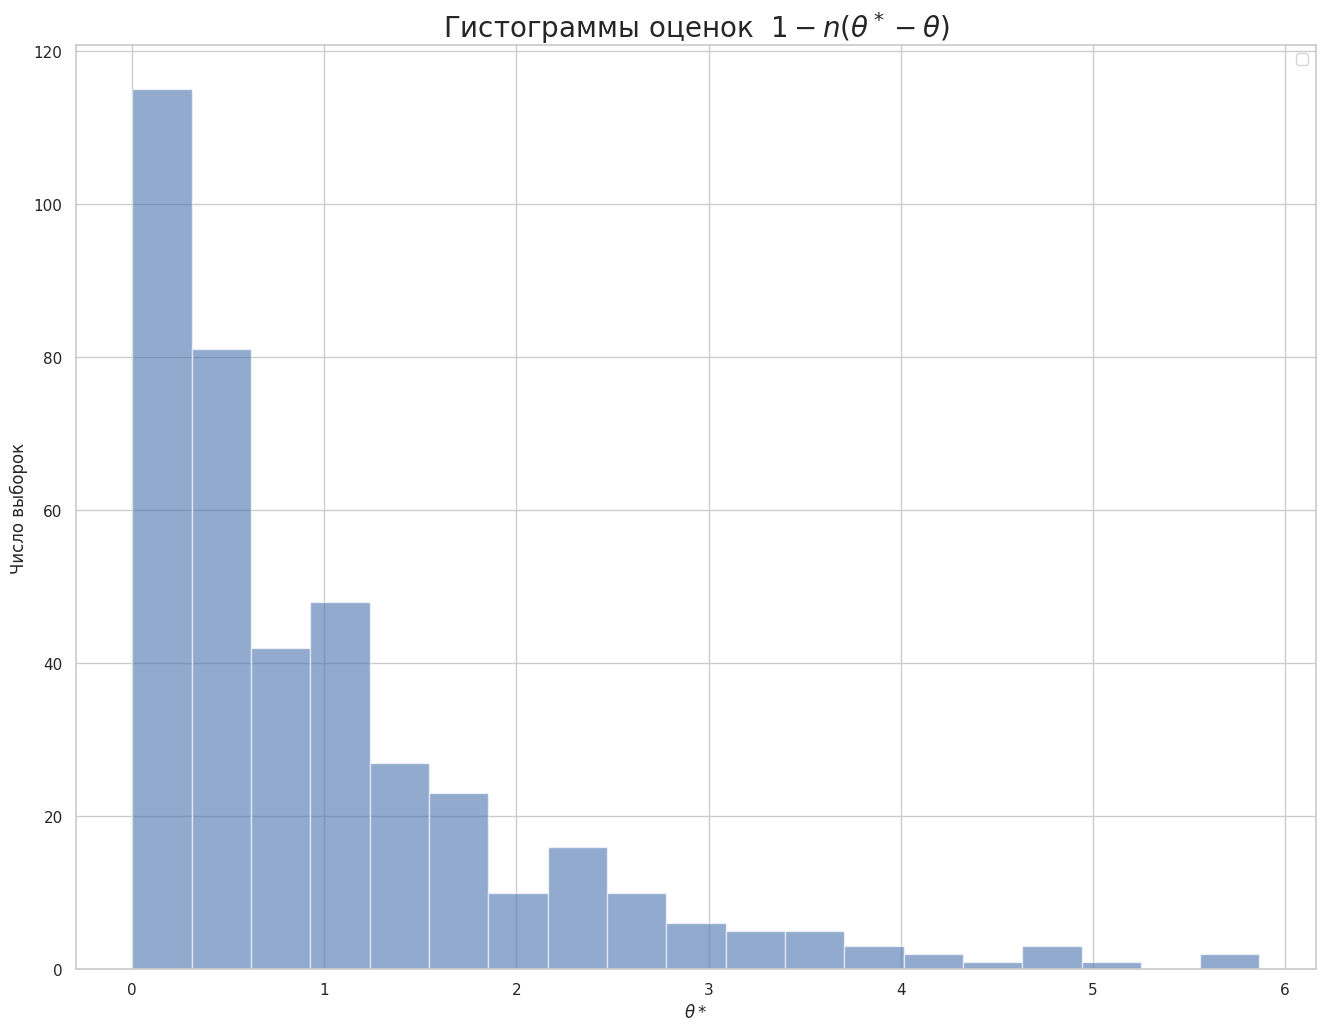

In [ ]:
estimate2 = 1 - N*(estimate_second - theta)
plt.figure(figsize=(16, 12))
plt.hist(x=estimate2, bins='auto', alpha=0.6)

plt.title("Гистограммы оценок  $1 - n  (\\theta^* - \\theta)$", fontsize=20)
plt.xlabel("$\\theta*$")
plt.ylabel("Число выборок")
plt.legend()
plt.show()

Данная оценка похожа на экспоненциальное распределение

На какие распределения похожи получившиеся гистограммы?

**Ответ:** выше

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\frac{\theta}{\sqrt(3)}$ - дисперсия была расчитана в задании 1 для подсчета функции риска

Посчитайте статистику
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$ для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

<Figure size 1600x1200 with 0 Axes>

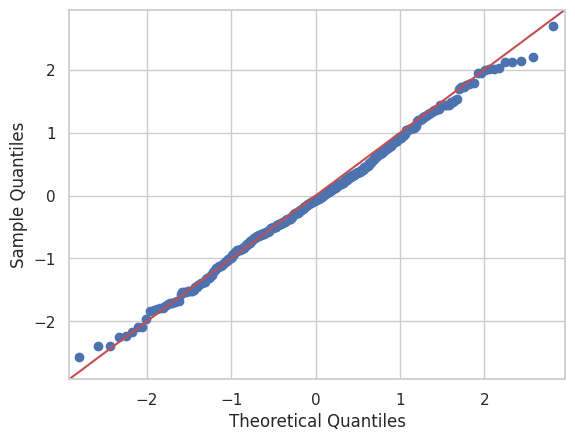

In [ ]:
import statsmodels.api as sm

plt.figure(figsize=(16, 12))
theta_norm = estimate1 * np.sqrt(3)
sm.qqplot(theta_norm, line='45')
plt.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** да, тк квантили совпали с красной линией

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:**

<Figure size 1600x1200 with 0 Axes>

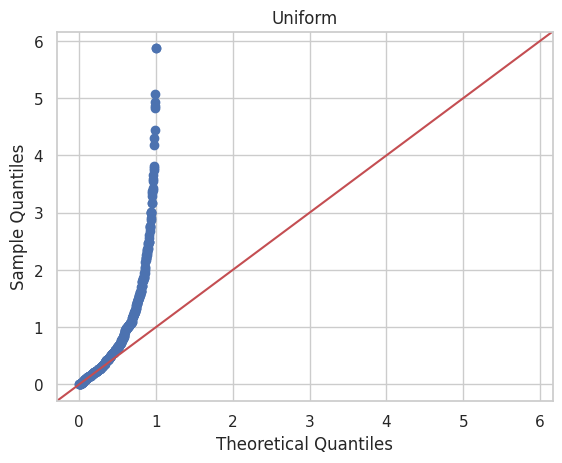

<Figure size 1600x1200 with 0 Axes>

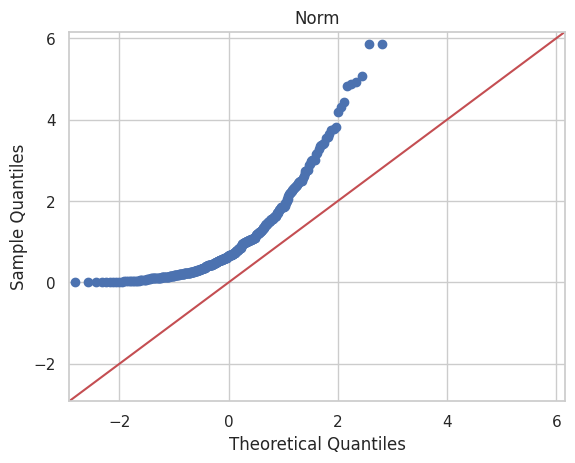

<Figure size 1600x1200 with 0 Axes>

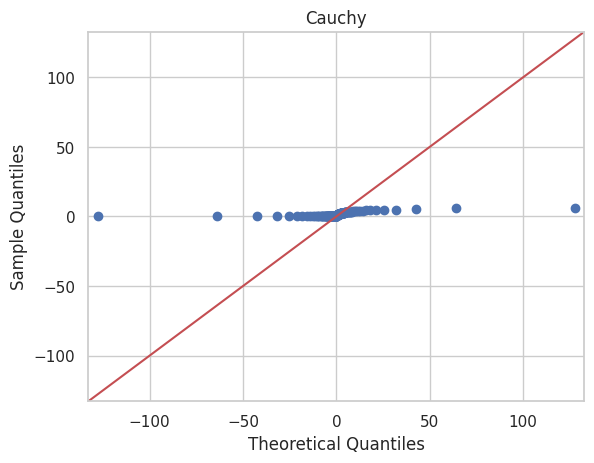

<Figure size 1600x1200 with 0 Axes>

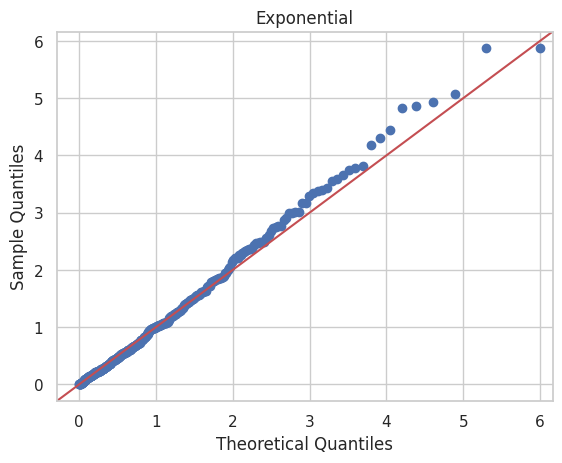

In [ ]:
plt.figure(figsize=(16, 12))
sm.qqplot(estimate2, dist= sps.uniform, line='45')
plt.title("Uniform")
plt.show()
plt.figure(figsize=(16, 12))
sm.qqplot(estimate2, dist= sps.norm, line='45')
plt.title("Norm")
plt.show()
plt.figure(figsize=(16, 12))
sm.qqplot(estimate2, dist= sps.cauchy, line='45')
plt.title("Cauchy")
plt.show()
plt.figure(figsize=(16, 12))
sm.qqplot(estimate2, dist= sps.expon, line='45')
plt.title("Exponential")
plt.show()

Лучше всего подходит экспоненциальное распределение. То есть предположение из предыдущего пункта оказалось верным

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

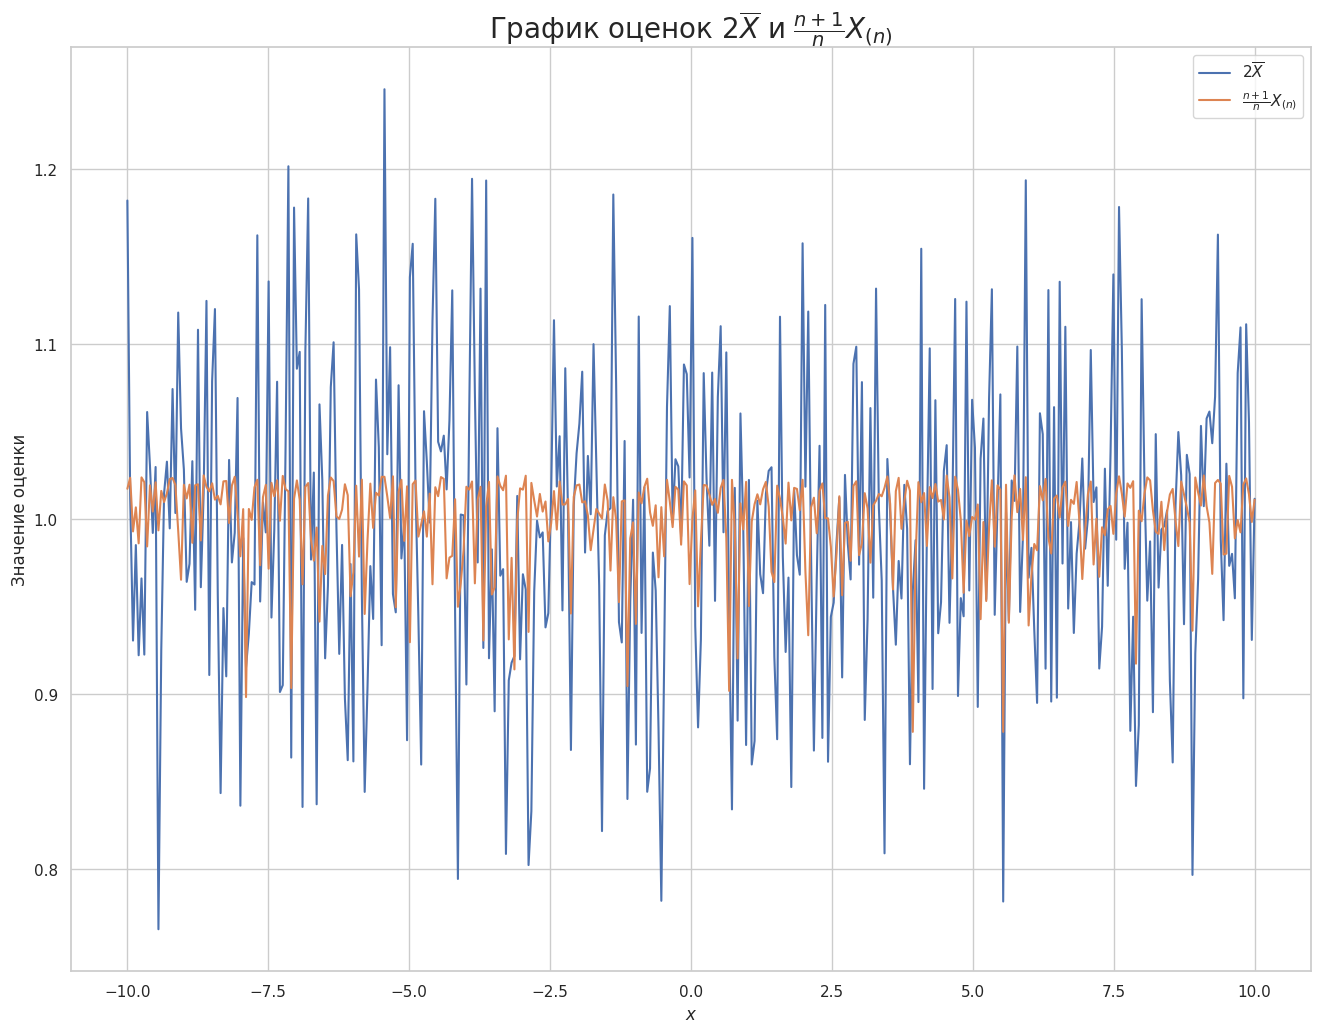

In [ ]:
plt.figure(figsize=(16, 12))
x = np.linspace(-10,10, N_samples)
plt.plot(x, estimate_first, label=r'$2\overline{X}$')
plt.plot(x, estimate_second, label=r'$\frac{n+1}{n} X_{(n)}$')

plt.title("График оценок $2\\overline{X}$ и $\\frac{n+1}{n} X_{(n)}$", fontsize=20)
plt.xlabel("$x$")
plt.ylabel("Значение оценки")
plt.legend()
plt.show()
plt.show()

Оценка $\frac{n+1}{n} X_{(n)}$ лучше так как она колеблется вблизи $\theta$ с меньшей интенсивностью, а следовательно быстрее приближается к истинному значению

# Задача 6

Эта задача проспонсирована великим магистром гнозиса Шабановым Дмитрием Александровичем. Когда-то (год назад) люди доказали, что сумма i.i.d. величин с конечной дисперсией в пределе имеет достаточно примитивное распределение.

Так как мы пока не придумали, как применить этот факт, задача предлагается к решению без веских на то причин.

В теорвере была задача, что для любого распределения с дисперсией и для любого $x$ у последовательности $P(\sum \xi_i \leq x)$ есть предел и он равен 0, 1 или 1/2. Проверьте это утверждение моделированием для хотя бы 3 распределений и 5 различных $x$. Выясните, когда предел принимает какое значение. Решите задачу (теоретически) и сформулируйте теорему о том, когда какой предел реализуется.

Важно: необходимо отыскать все три случая значения предела.

Комментарий: 5 баллов тем, кто найдёт хотя бы 2 из 3 случаев значений предела и опишет их. 10 баллов за все три случая. +5 баллов за теорему с доказательством.

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.